In [108]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall, Statistics
using KernelDensity: kde
@pyimport numpy as np
@pyimport scienceplots

In [109]:
# データの読み込み
obs10deg = CSV.read("../MPC/observation/obs_20deg_3msEF.csv", DataFrame)
obs20deg = CSV.read("../MPC/observation/obs_20deg_5msEF.csv", DataFrame)
obs35deg = CSV.read("../MPC/observation/obs_20deg_7msEF.csv", DataFrame)

start_num = 1
end_num = 100
number = end_num - start_num + 1

duration = 50
dt = 0.25
sampling = Int(duration / dt)
whole_step = sampling

data_start = 1
data_end = whole_step-1
obs_start = 1
obs_end = whole_step-1

time_list = range(0.00, stop=duration,  step=dt)

data1 = []
data2 = []
data3 = []

for q in start_num:end_num   
    push!(data1, CSV.read("../MPC/result/04/MPC_result$(q).csv", DataFrame))
end

for q in start_num:end_num   
    push!(data2, CSV.read("../MPC/result/05/MPC_result$(q).csv", DataFrame))
end

for q in start_num:end_num   
    push!(data3, CSV.read("../MPC/result/02/MPC_result$(q).csv", DataFrame))
end

In [110]:
x_F1 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        X_F_values = [df[i, :X_F] for df in data1[1:number]]
        transformed_values = [df[i, :X_F]*cos(df[i, :ψ]) - df[i, :Y_F]*sin(df[i, :ψ]) for df in data1[1:number]]
        kde_result_X_F = kde(X_F_values)
        kde_result_transformed = kde(transformed_values)
        x_F1[i,1] = kde_result_X_F.x[argmax(kde_result_X_F.density)] 
        x_F1[i,2] = median(X_F_values)
        x_F1[i,3] = kde_result_transformed.x[argmax(kde_result_transformed.density)]  # 変換後のモード
        x_F1[i,4] = median(transformed_values)
    end
end

y_F1 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        Y_F_values = [df[i, :Y_F] for df in data1[1:number]]
        transformed_values = [df[i, :X_F]*sin(df[i, :ψ]) + df[i, :Y_F]*cos(df[i, :ψ]) for df in data1[1:number]]
        kde_result_Y_F = kde(Y_F_values)
        kde_result_transformed = kde(transformed_values)
        y_F1[i,1] = kde_result_Y_F.x[argmax(kde_result_Y_F.density)] 
        y_F1[i,2] = median(Y_F_values)
        y_F1[i,3] = kde_result_transformed.x[argmax(kde_result_transformed.density)]  # 変換後のモード
        y_F1[i,4] = median(transformed_values)
    end
end

n_F1 = zeros(sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        N_F_values = [df[i, :N_F] for df in data1[1:number]]
        kde_result_N_F = kde(N_F_values)
        n_F1[i,1] = kde_result_N_F.x[argmax(kde_result_N_F.density)] 
        n_F1[i,2] = median(N_F_values)
    end
end

cols = Int(duration/dt) + 1
df = DataFrame(
    time = collect(0:dt:duration),
    x_F_body_mode=zeros(cols),
    x_F_body_median=zeros(cols),
    y_F_body_mode=zeros(cols),
    y_F_body_median=zeros(cols),
    n_F_body_mode=zeros(cols),
    n_F_body_median=zeros(cols),
    x_F_earth_mode=zeros(cols),
    x_F_earth_median=zeros(cols),
    y_F_earth_mode=zeros(cols),
    y_F_earth_median=zeros(cols),
)
for i in 2:Int(duration/dt)
    df[i,2:11] = [x_F1[i,1], x_F1[i,2], y_F1[i,1], y_F1[i,2], n_F1[i,1], n_F1[i,2], x_F1[i,3], x_F1[i,4], y_F1[i,3], y_F1[i,4]]
end
# CSV.write("./EF_rand/100.csv", df)

x_F2 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        X_F_values = [df[i, :X_F] for df in data2[1:number]]
        transformed_values = [df[i, :X_F]*cos(df[i, :ψ]) - df[i, :Y_F]*sin(df[i, :ψ]) for df in data2[1:number]]
        kde_result_X_F = kde(X_F_values)
        kde_result_transformed = kde(transformed_values)
        x_F2[i,1] = kde_result_X_F.x[argmax(kde_result_X_F.density)] 
        x_F2[i,2] = median(X_F_values)
        x_F2[i,3] = kde_result_transformed.x[argmax(kde_result_transformed.density)]  # 変換後のモード
        x_F2[i,4] = median(transformed_values)
    end
end

y_F2 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        Y_F_values = [df[i, :Y_F] for df in data2[1:number]]
        transformed_values = [df[i, :X_F]*sin(df[i, :ψ]) + df[i, :Y_F]*cos(df[i, :ψ]) for df in data2[1:number]]
        kde_result_Y_F = kde(Y_F_values)
        kde_result_transformed = kde(transformed_values)
        y_F2[i,1] = kde_result_Y_F.x[argmax(kde_result_Y_F.density)] 
        y_F2[i,2] = median(Y_F_values)
        y_F2[i,3] = kde_result_transformed.x[argmax(kde_result_transformed.density)]  # 変換後のモード
        y_F2[i,4] = median(transformed_values)
    end
end

n_F2 = zeros(sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        N_F_values = [df[i, :N_F] for df in data2[1:number]]
        kde_result_N_F = kde(N_F_values)
        n_F2[i,1] = kde_result_N_F.x[argmax(kde_result_N_F.density)] 
        n_F2[i,2] = median(N_F_values)
    end
end

cols = Int(duration/dt) + 1
df = DataFrame(
    time = collect(0:dt:duration),
    x_F_body_mode=zeros(cols),
    x_F_body_median=zeros(cols),
    y_F_body_mode=zeros(cols),
    y_F_body_median=zeros(cols),
    n_F_body_mode=zeros(cols),
    n_F_body_median=zeros(cols),
    x_F_earth_mode=zeros(cols),
    x_F_earth_median=zeros(cols),
    y_F_earth_mode=zeros(cols),
    y_F_earth_median=zeros(cols)
)
for i in 2:Int(duration/dt)
    df[i,2:11] = [x_F1[i,1], x_F1[i,2], y_F1[i,1], y_F1[i,2], n_F1[i,1], n_F1[i,2], x_F1[i,3], x_F1[i,4], y_F1[i,3], y_F1[i,4]]
end
# CSV.write("./EF_rand/80.csv", df)

x_F3 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        X_F_values = [df[i, :X_F] for df in data3[1:number]]
        transformed_values = [df[i, :X_F]*cos(df[i, :ψ]) - df[i, :Y_F]*sin(df[i, :ψ]) for df in data3[1:number]]
        kde_result_X_F = kde(X_F_values)
        kde_result_transformed = kde(transformed_values)
        x_F3[i,1] = kde_result_X_F.x[argmax(kde_result_X_F.density)] 
        x_F3[i,2] = median(X_F_values)
        x_F3[i,3] = kde_result_transformed.x[argmax(kde_result_transformed.density)]  # 変換後のモード
        x_F3[i,4] = median(transformed_values)
    end
end

y_F3 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        Y_F_values = [df[i, :Y_F] for df in data3[1:number]]
        transformed_values = [df[i, :X_F]*sin(df[i, :ψ]) + df[i, :Y_F]*cos(df[i, :ψ]) for df in data3[1:number]]
        kde_result_Y_F = kde(Y_F_values)
        kde_result_transformed = kde(transformed_values)
        y_F3[i,1] = kde_result_Y_F.x[argmax(kde_result_Y_F.density)] 
        y_F3[i,2] = median(Y_F_values)
        y_F3[i,3] = kde_result_transformed.x[argmax(kde_result_transformed.density)]  # 変換後のモード
        y_F3[i,4] = median(transformed_values)
    end
end

n_F3 = zeros(sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        N_F_values = [df[i, :N_F] for df in data3[1:number]]
        kde_result_N_F = kde(N_F_values)
        n_F3[i,1] = kde_result_N_F.x[argmax(kde_result_N_F.density)] 
        n_F3[i,2] = median(N_F_values)
    end
end

cols = Int(duration/dt) + 1
df = DataFrame(
    time = collect(0:dt:duration),
    x_F_body_mode=zeros(cols),
    x_F_body_median=zeros(cols),
    y_F_body_mode=zeros(cols),
    y_F_body_median=zeros(cols),
    n_F_body_mode=zeros(cols),
    n_F_body_median=zeros(cols),
    x_F_earth_mode=zeros(cols),
    x_F_earth_median=zeros(cols),
    y_F_earth_mode=zeros(cols),
    y_F_earth_median=zeros(cols)
)
for i in 2:Int(duration/dt)
    df[i,2:11] = [x_F1[i,1], x_F1[i,2], y_F1[i,1], y_F1[i,2], n_F1[i,1], n_F1[i,2], x_F1[i,3], x_F1[i,4], y_F1[i,3], y_F1[i,4]]
end
# CSV.write("./EF_rand/60.csv", df)

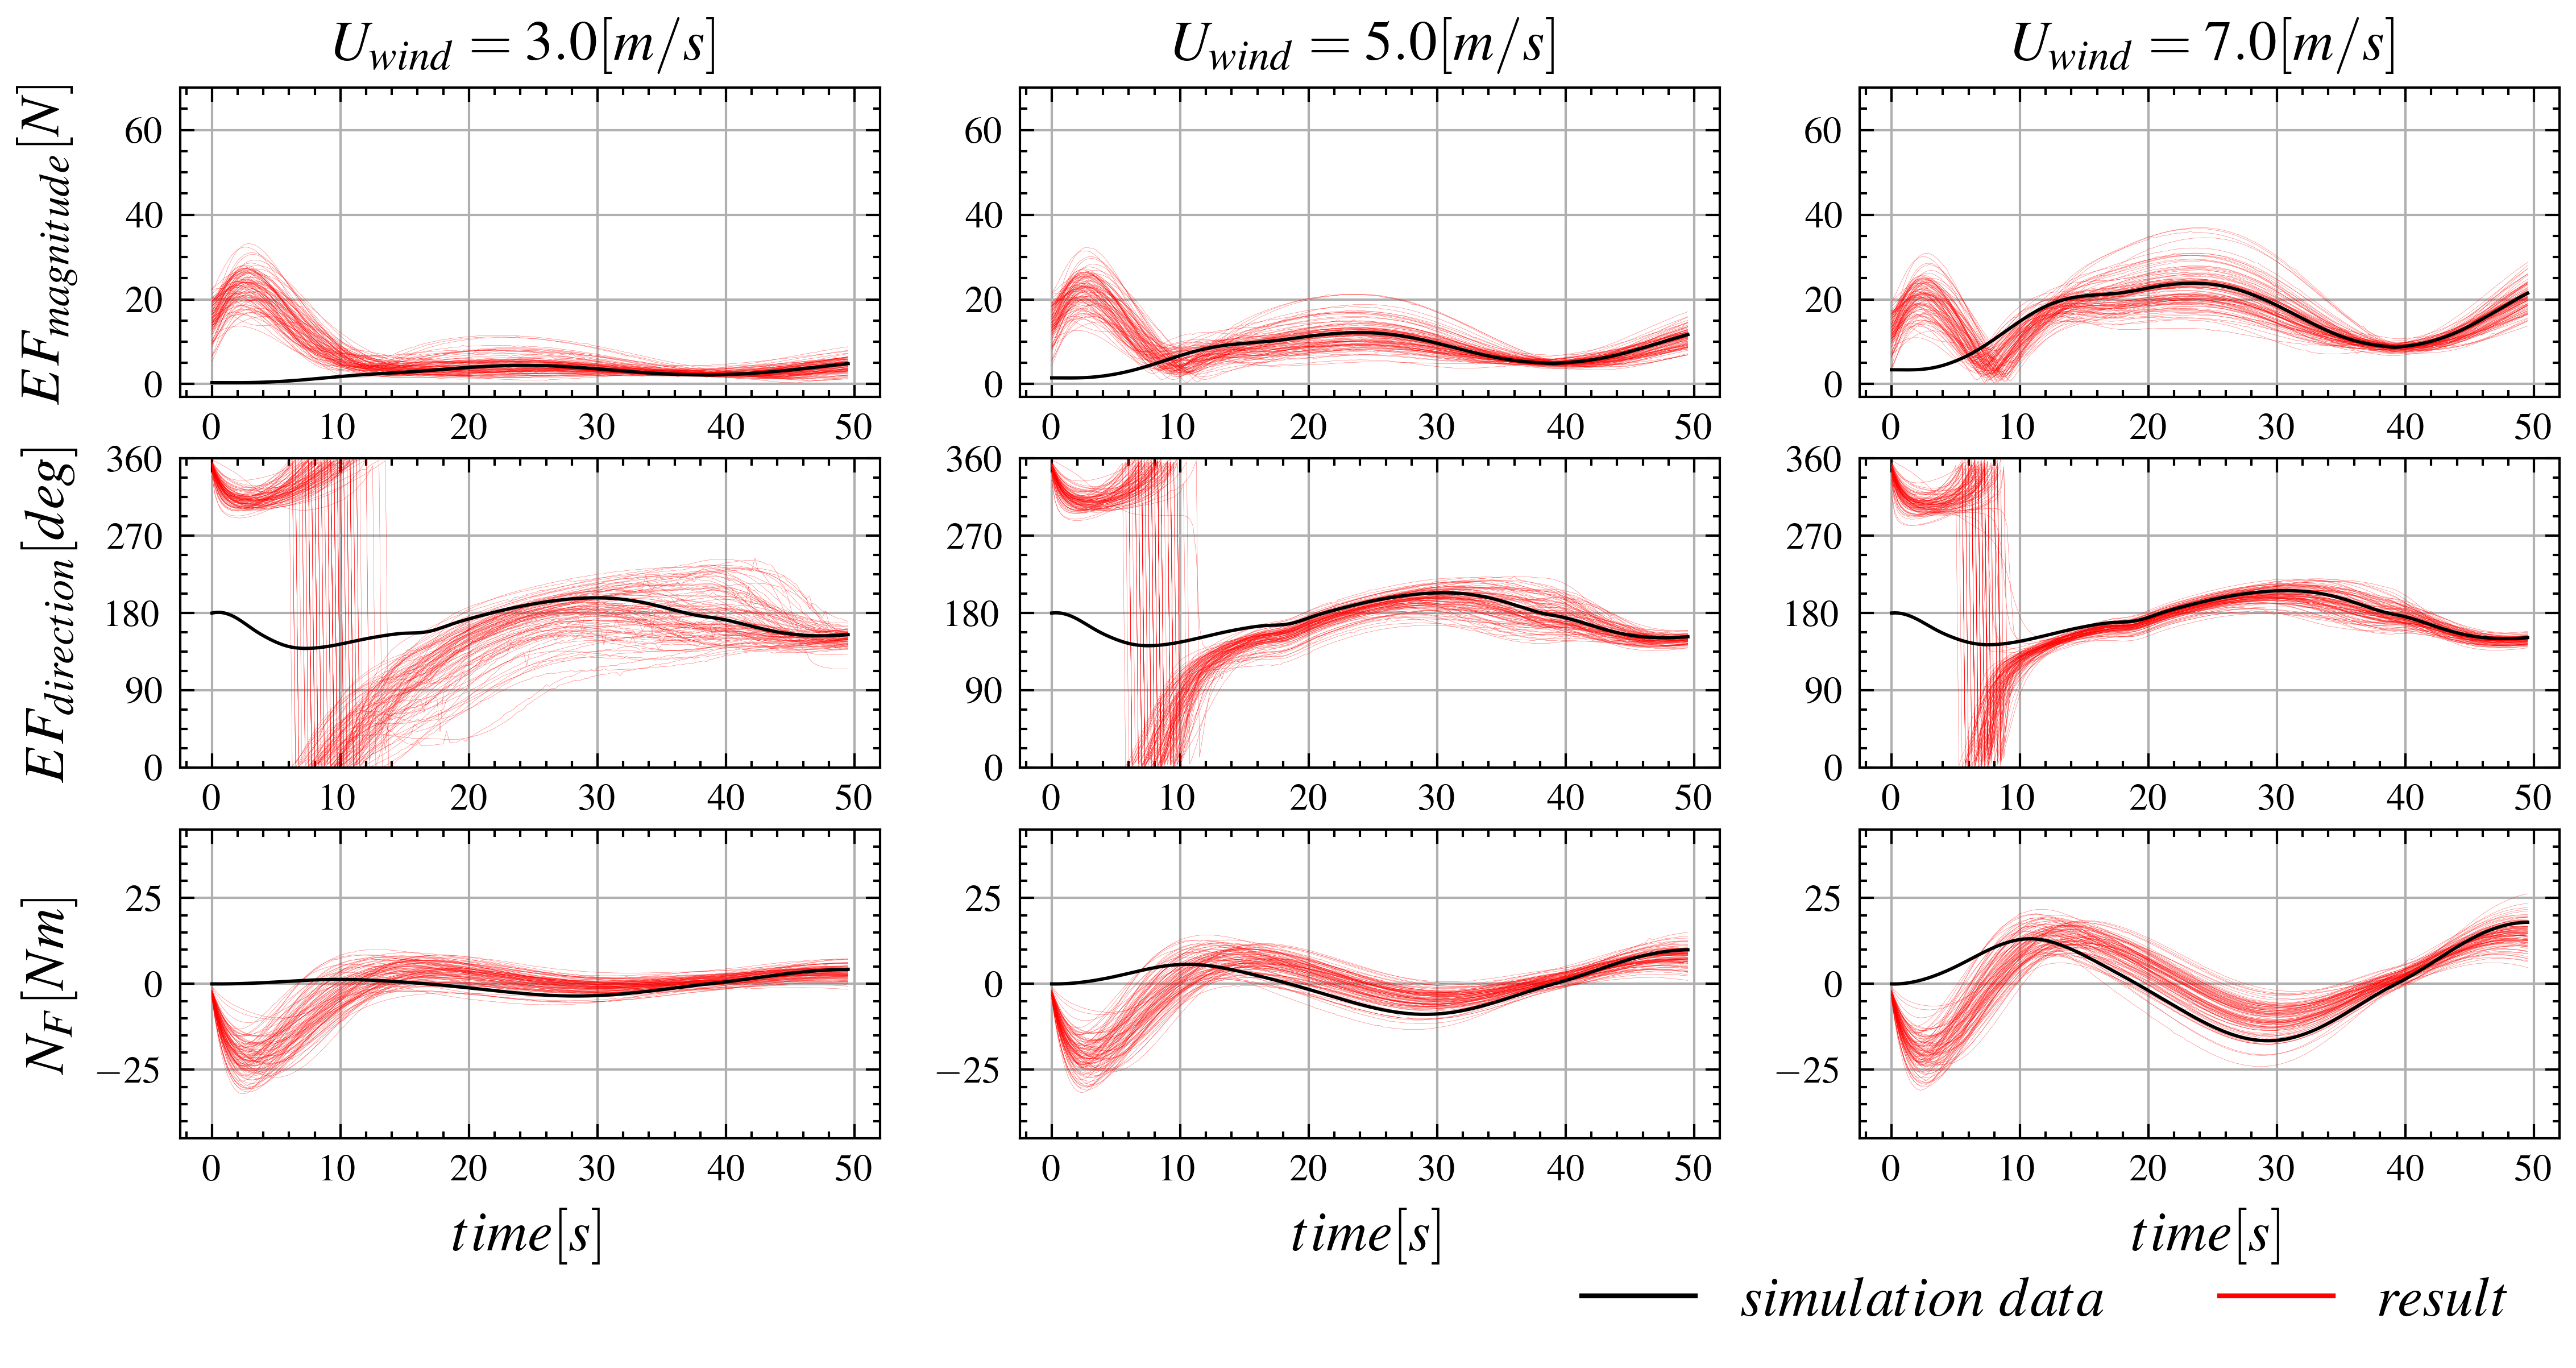

In [111]:
plt.style.use(["science", "ieee"])

x_top = 70
x_bottom = -3
n_top = 45
n_bottom = -45

function atan2_2pi(y, x)
    θ = atan(y, x)
    return θ >= 0 ? θ : θ + 2π
end

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title(L"10\mathchar`-degree~turning~test", fontsize=12)
ax1.set_title(L"U_{wind}=3.0[m/s]", fontsize=12)
# ax1.set_title(L"Noise~L1", fontsize=12)
for q in 1:number
    ax1.plot(data1[q][data_start:data_end,"time"], sqrt.(data1[q][data_start:data_end,"X_F"].^2 .+ data1[q][data_start:data_end,"Y_F"].^2),  "-", c="red", alpha=0.8, linewidth=0.05) 
end
ax1.plot(obs10deg[obs_start:obs_end,"time"], sqrt.(obs10deg[obs_start:obs_end,"X_wind"].^2 .+ obs10deg[obs_start:obs_end,"Y_wind"].^2), "-", c="k", alpha=1, linewidth=0.7)
# ax1.plot(obs10deg[obs_start:obs_end,"time"], sqrt.(x_F1[obs_start:obs_end,1].^2 .+ y_F1[obs_start:obs_end,1].^2), "v", label="average", c="b", markersize=1, alpha = 1)
# ax1.plot(obs10deg[obs_start:obs_end,"time"], sqrt.(x_F1[obs_start:obs_end,2].^2 .+ y_F1[obs_start:obs_end,2].^2), ".", label="median", c="g", markersize=1, alpha = 1)
ax1.set_ylabel(L"EF_{magnitude}[N]", fontsize=12)
ax1.set_ylim(x_bottom, x_top)
ax1.grid()

ax2 = fig.add_subplot(3, 3, 4)
for q in 1:number
    ax2.plot(data1[q][data_start:data_end,"time"], mod.(atan2_2pi.(data1[q][data_start:data_end,"Y_F"], data1[q][data_start:data_end,"X_F"]) .- pi .+ data1[q][data_start:data_end,"ψ"], 2*pi)./pi.*180,  "-", c="red", alpha=0.8, linewidth=0.05)
end
ax2.plot(obs10deg[obs_start:obs_end,"time"], mod.(atan2_2pi.(obs10deg[obs_start:obs_end,"Y_wind"], obs10deg[obs_start:obs_end,"X_wind"]) .- pi .+ obs10deg[obs_start:obs_end, "ψ"], 2*pi)./pi.*180, "-", c="k", alpha=1, linewidth=0.7)
# ax2.plot(obs10deg[obs_start:obs_end,"time"], atan.(x_F1[obs_start:obs_end,1]./y_F1[obs_start:obs_end,1])./pi.*180, "v", label="average", c="b", markersize=1, alpha = 1)
# ax2.plot(obs10deg[obs_start:obs_end,"time"], atan.(x_F1[obs_start:obs_end,2]./y_F1[obs_start:obs_end,2])./pi.*180, ".", label="median", c="g", markersize=1, alpha = 1)
ax2.set_ylabel(L"EF_{direction}[deg]", fontsize=12)
ax2.set_xlabel(L"time[s]", fontsize=12)
ax2.set_ylim(0,360)
ax2.set_yticks([0, 90, 180, 270, 360])
ax2.grid()

ax3 = fig.add_subplot(3, 3, 7)
for q in 1:number
    ax3.plot(data1[q][data_start:data_end,"time"], data1[q][data_start:data_end,"N_F"],  "-", c="red", alpha=0.8, linewidth=0.05)
end
ax3.plot(obs10deg[obs_start:obs_end,"time"], obs10deg[obs_start:obs_end,"N_wind"], "-", c="k", alpha=1, linewidth=0.7)
# ax3.plot(obs10deg[obs_start:obs_end,"time"], n_F1[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
# ax3.plot(obs10deg[obs_start:obs_end,"time"], n_F1[obs_start:obs_end,2], ".",  c="g", markersize=1, alpha = 1)
ax3.set_ylabel(L"N_{F}[Nm]", fontsize=12)
ax3.set_ylim(n_bottom, n_top)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)

ax1 = fig.add_subplot(3, 3, 2)
ax1.set_title(L"20\mathchar`-degree~turning~test", fontsize=12)
ax1.set_title(L"U_{wind}=5.0[m/s]", fontsize=12)
# ax1.set_title(L"Noise~L2", fontsize=12)
for q in 1:number
    ax1.plot(data2[q][data_start:data_end,"time"], sqrt.(data2[q][data_start:data_end,"X_F"].^2 .+ data2[q][data_start:data_end,"Y_F"].^2),  "-", c="red", alpha=0.8, linewidth=0.05) 
end
ax1.plot(obs20deg[obs_start:obs_end,"time"], sqrt.(obs20deg[obs_start:obs_end,"X_wind"].^2 .+ obs20deg[obs_start:obs_end,"Y_wind"].^2), "-", c="k", alpha=1, linewidth=0.7)
# ax1.plot(obs20deg[obs_start:obs_end,"time"], sqrt.(x_F2[obs_start:obs_end,1].^2 .+ y_F2[obs_start:obs_end,1].^2), "v", label="average", c="b", markersize=1, alpha = 1)
# ax1.plot(obs20deg[obs_start:obs_end,"time"], sqrt.(x_F2[obs_start:obs_end,2].^2 .+ y_F2[obs_start:obs_end,2].^2), ".", label="median", c="g", markersize=1, alpha = 1)
ax1.grid()
ax1.set_ylim(x_bottom, x_top)

ax2 = fig.add_subplot(3, 3, 5)
for q in 1:number
    ax2.plot(data2[q][data_start:data_end,"time"], mod.((atan2_2pi.(data2[q][data_start:data_end,"Y_F"], data2[q][data_start:data_end,"X_F"]) .- pi .+ data2[q][data_start:data_end,"ψ"]), 2*pi)./pi.*180,  "-", c="red", alpha=0.8, linewidth=0.05)
end
ax2.plot(obs20deg[obs_start:obs_end,"time"], mod.(atan2_2pi.(obs20deg[obs_start:obs_end,"Y_wind"], obs20deg[obs_start:obs_end,"X_wind"]) .- pi .+ obs20deg[obs_start:obs_end, "ψ"], 2*pi)./pi.*180, "-", c="k", alpha=1, linewidth=0.7)
# ax2.plot(obs20deg[obs_start:obs_end,"time"], atan.(x_F2[obs_start:obs_end,1]./y_F2[obs_start:obs_end,1])./pi.*180, "v", label="average", c="b", markersize=1, alpha = 1)
# ax2.plot(obs20deg[obs_start:obs_end,"time"], atan.(x_F2[obs_start:obs_end,2]./y_F2[obs_start:obs_end,2])./pi.*180, ".", label="median", c="g", markersize=1, alpha = 1)
ax2.set_xlabel(L"time[s]", fontsize=12)
ax2.set_ylim(0,360)
ax2.set_yticks([0, 90, 180, 270, 360])
ax2.grid()

ax3 = fig.add_subplot(3, 3, 8)
for q in 1:number
    ax3.plot(data2[q][data_start:data_end,"time"], data2[q][data_start:data_end,"N_F"],  "-", c="red", alpha=0.8, linewidth=0.05)
end
ax3.plot(obs20deg[obs_start:obs_end,"time"], obs20deg[obs_start:obs_end,"N_wind"], "-", c="k", alpha=1, linewidth=0.7)
# ax3.plot(obs20deg[obs_start:obs_end,"time"], n_F2[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
# ax3.plot(obs20deg[obs_start:obs_end,"time"], n_F2[obs_start:obs_end,2], ".", c="g", markersize=1, alpha = 1)
ax3.set_ylim(n_bottom, n_top)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)

ax1 = fig.add_subplot(3, 3, 3)
ax1.set_title(L"35\mathchar`-degree~turning~test", fontsize=12)
ax1.set_title(L"U_{wind}=7.0[m/s]", fontsize=12)
# ax1.set_title(L"Noise~L3", fontsize=12)
for q in 1:number
    ax1.plot(data3[q][data_start:data_end,"time"], sqrt.(data3[q][data_start:data_end,"X_F"].^2 .+ data3[q][data_start:data_end,"Y_F"].^2),  "-", c="red", alpha=0.8, linewidth=0.05) 
end
ax1.plot(obs35deg[obs_start:obs_end,"time"], sqrt.(obs35deg[obs_start:obs_end,"X_wind"].^2 .+ obs35deg[obs_start:obs_end,"Y_wind"].^2), "-", c="k", alpha=1, linewidth=0.7)
# ax1.plot(obs35deg[obs_start:obs_end,"time"], sqrt.(x_F3[obs_start:obs_end,1].^2 .+ y_F3[obs_start:obs_end,1].^2), "v", label="average", c="b", markersize=1, alpha = 1)
# ax1.plot(obs35deg[obs_start:obs_end,"time"], sqrt.(x_F3[obs_start:obs_end,2].^2 .+ y_F3[obs_start:obs_end,2].^2), ".", label="median", c="g", markersize=1, alpha = 1)
ax1.grid()
ax1.set_ylim(x_bottom, x_top)

ax2 = fig.add_subplot(3, 3, 6)
for q in 1:number
    ax2.plot(data3[q][data_start:data_end,"time"], mod.((atan2_2pi.(data3[q][data_start:data_end,"Y_F"], data3[q][data_start:data_end,"X_F"]) .- 1.0*pi .+data3[q][data_start:data_end,"ψ"]), 2*pi)./pi.*180,  "-", c="red", alpha=0.8, linewidth=0.05)
end
ax2.plot(obs35deg[obs_start:obs_end,"time"], mod.((atan2_2pi.(obs35deg[obs_start:obs_end,"Y_wind"], obs35deg[obs_start:obs_end,"X_wind"])) .- 1.0*pi .+ obs35deg[obs_start:obs_end, "ψ"], 2*pi)./pi.*180, "-", c="k", alpha=1, linewidth=0.7)
# ax2.plot(obs35deg[obs_start:obs_end,"time"], atan.(x_F3[obs_start:obs_end,1]./y_F3[obs_start:obs_end,1])./pi.*180, "v", label="average", c="b", markersize=1, alpha = 1)
# ax2.plot(obs35deg[obs_start:obs_end,"time"], atan.(x_F3[obs_start:obs_end,2]./y_F3[obs_start:obs_end,2])./pi.*180, ".", label="median", c="g", markersize=1, alpha = 1)
ax2.set_xlabel(L"time[s]", fontsize=12)
ax2.set_ylim(0,360)
ax2.set_yticks([0, 90, 180, 270, 360])
ax2.grid()

ax3 = fig.add_subplot(3, 3, 9)
for q in 1:number
    ax3.plot(data3[q][data_start:data_end,"time"], data3[q][data_start:data_end,"N_F"],  "-", c="red", alpha=0.8, linewidth=0.05)
end
ax3.plot(obs35deg[obs_start:obs_end,"time"], obs35deg[obs_start:obs_end,"N_wind"], "-", c="k", alpha=1, linewidth=0.7)
# ax3.plot(obs35deg[obs_start:obs_end,"time"], n_F3[obs_start:obs_end,1], "v", label="average", c="b", markersize=1, alpha = 1)
# ax3.plot(obs35deg[obs_start:obs_end,"time"], n_F3[obs_start:obs_end,2], ".", label="median", c="g", markersize=1, alpha = 1)
# ax3.plot(data3[1][data_start:data_end,"time"], data3[1][data_start:data_end,"N_F"], ".", color="r", markersize=0.1, label="MPC")
ax3.set_ylim(n_bottom, n_top)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)
ax3.plot([],[], "-", label=L"simulation~data",  c="black", linewidth=1)
ax3.plot([],[], "-", label=L"result",  c="red", linewidth=1)
ax3.legend(bbox_to_anchor=(1.0, -0.28), fontsize=12, ncol=2)

fig.align_labels()
display(fig)

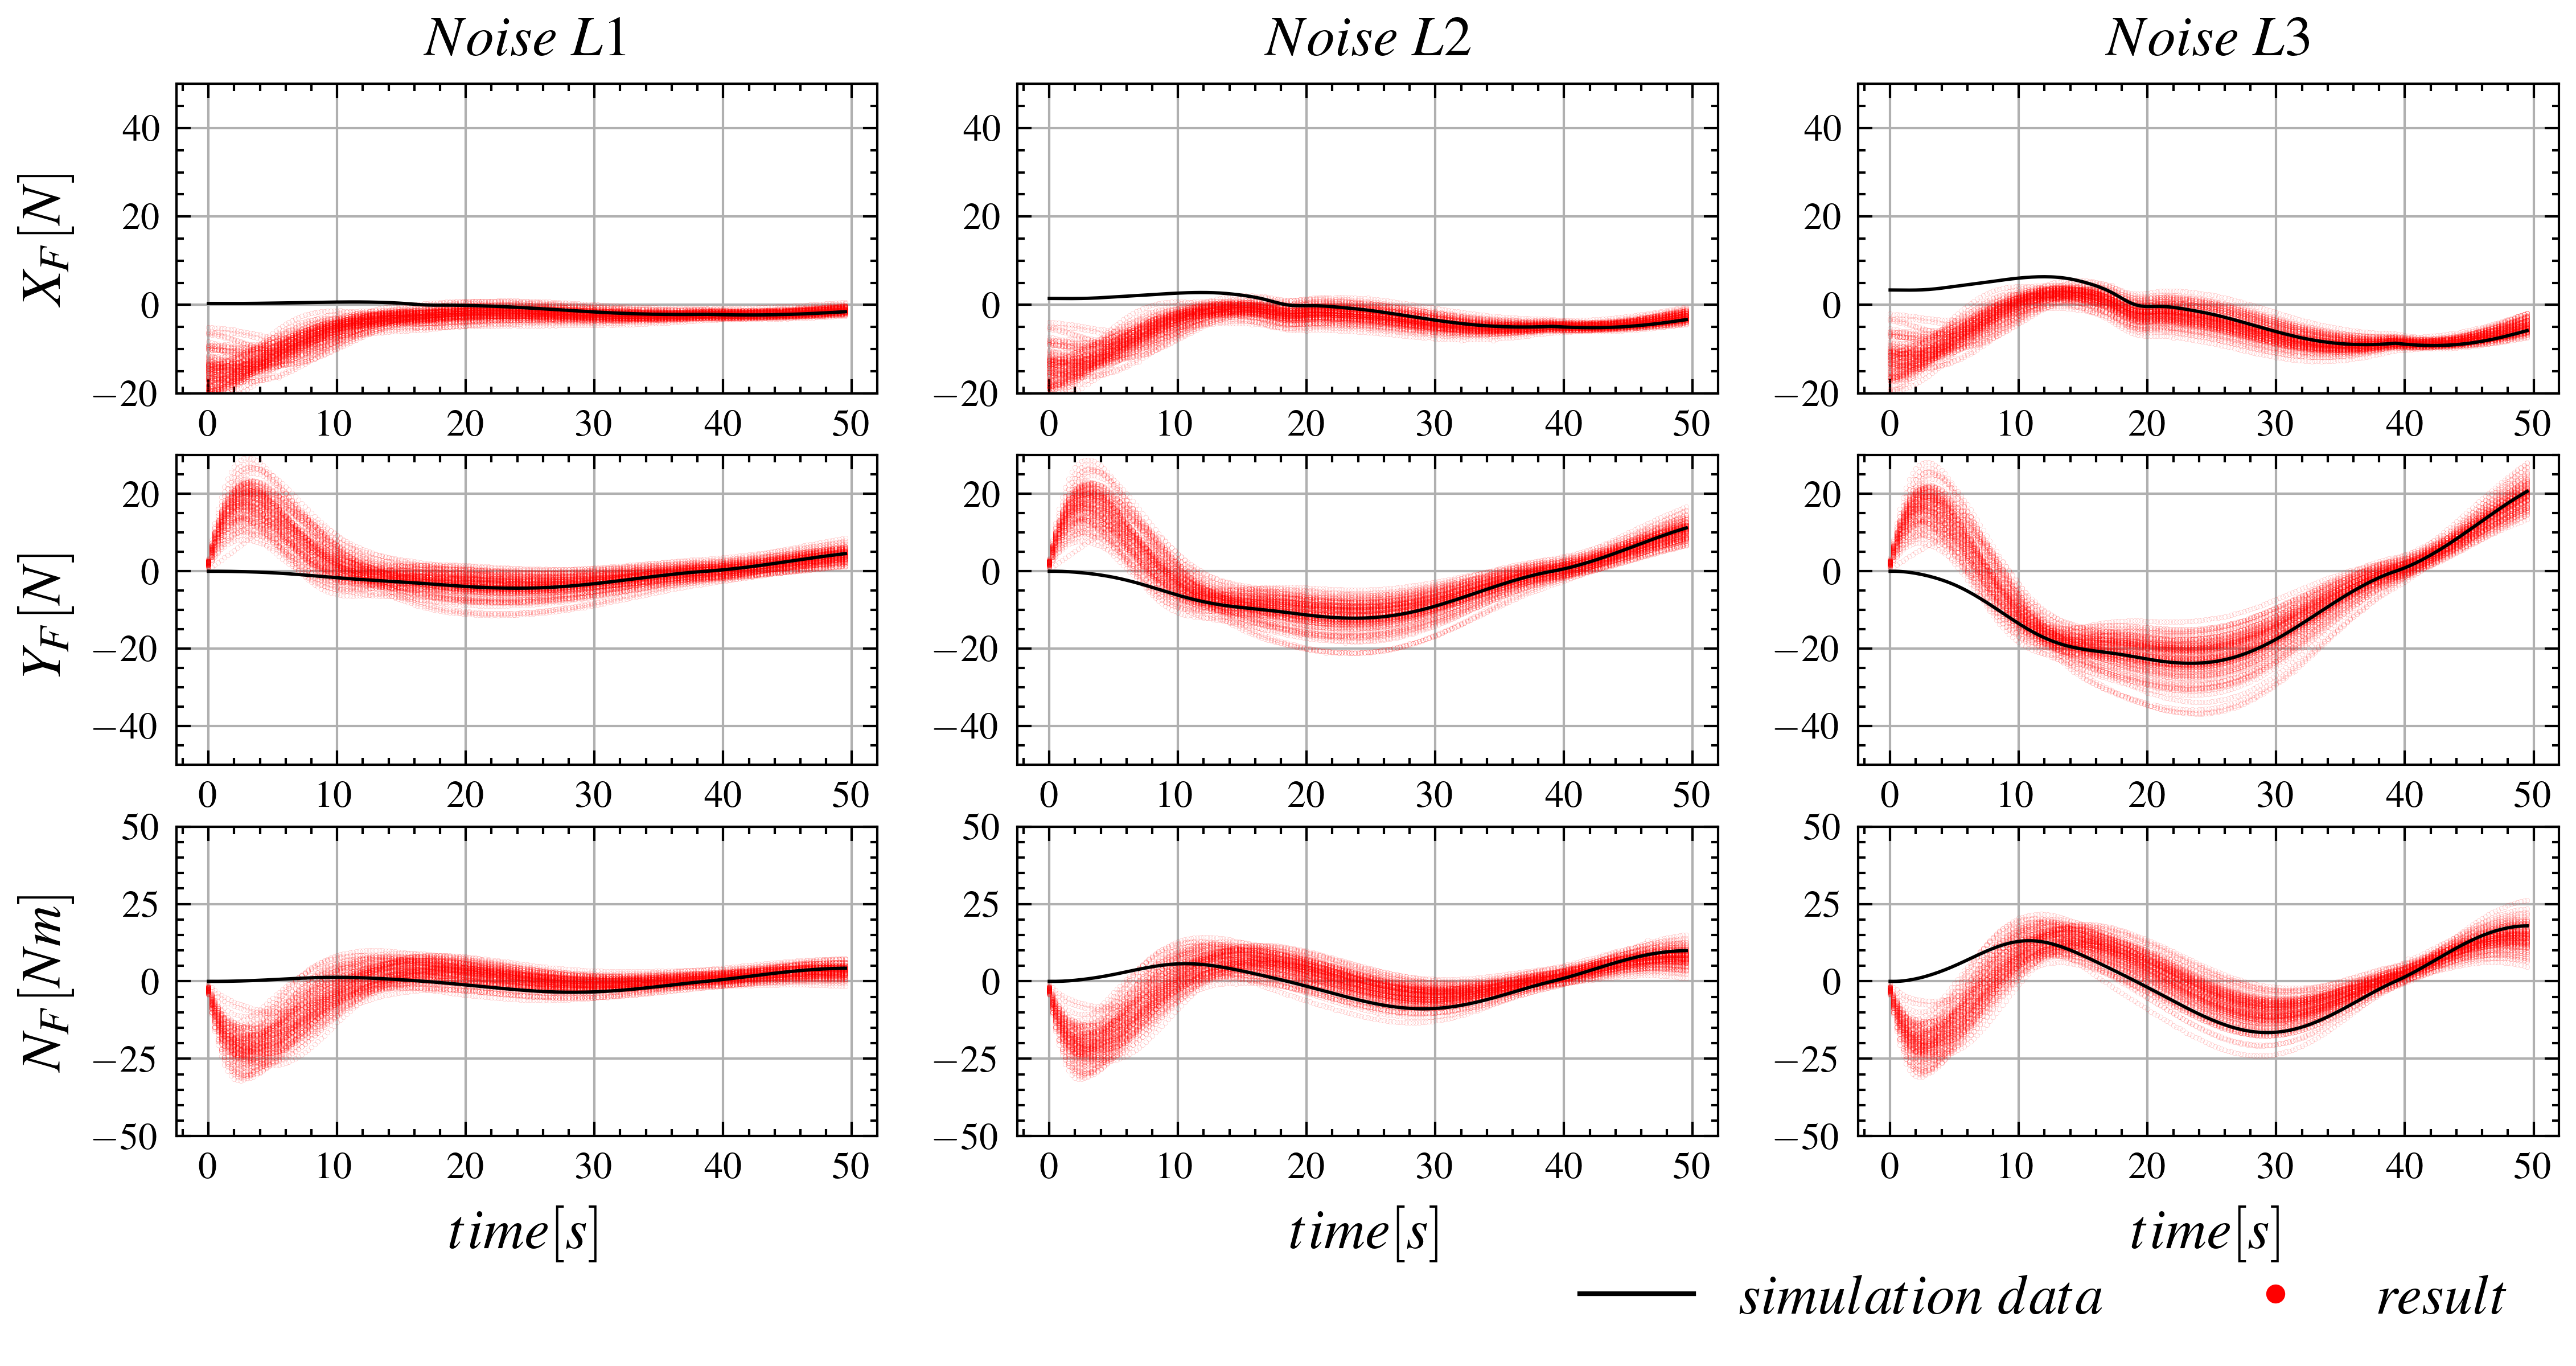

In [112]:
plt.style.use(["science", "ieee"])

x_top = 50
x_bottom = -20
y_top = 30
y_bottom = -50
n_top = 50
n_bottom = -50

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title(L"10\mathchar`-degree~turning~test", fontsize=12)
ax1.set_title(L"U_{wind}=3.0[m/s]", fontsize=12)
ax1.set_title(L"Noise~L1", fontsize=12)
for q in 1:number
    ax1.plot(data1[q][data_start:data_end,"time"], data1[q][data_start:data_end,"X_F"], ".", color="r", markersize=0.1, alpha=0.4) 
end
ax1.plot(obs10deg[obs_start:obs_end,"time"], obs10deg[obs_start:obs_end,"X_wind"], "-", c="k", alpha=1, linewidth=0.7) 
# ax1.plot(obs10deg[obs_start:obs_end,"time"], x_F1[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
# ax1.plot(obs10deg[obs_start:obs_end,"time"], x_F1[obs_start:obs_end,2], ".", c="g", markersize=1, alpha = 1)
ax1.set_ylabel(L"X_{F}[N]", fontsize=12)
ax1.set_ylim(x_bottom, x_top)
ax1.grid()

ax2 = fig.add_subplot(3, 3, 4)
for q in 1:number
    ax2.plot(data1[q][data_start:data_end,"time"], data1[q][data_start:data_end,"Y_F"], ".", color="r", markersize=0.1, alpha=0.35)
end
ax2.plot(obs10deg[obs_start:obs_end,"time"], obs10deg[obs_start:obs_end,"Y_wind"], "-", c="k", alpha=1, linewidth=0.7)
# ax2.plot(obs10deg[obs_start:obs_end,"time"], y_F1[obs_start:obs_end,1], "v",c="b", markersize=1, alpha = 1)
# ax2.plot(obs10deg[obs_start:obs_end,"time"], y_F1[obs_start:obs_end,2], ".",  c="g", markersize=1, alpha = 1)
ax2.set_ylabel(L"Y_{F}[N]", fontsize=12)
ax2.set_ylim(y_bottom, y_top)
ax2.grid()

ax3 = fig.add_subplot(3, 3, 7)
for q in 1:number
    ax3.plot(data1[q][data_start:data_end,"time"], data1[q][data_start:data_end,"N_F"], ".", color="r", markersize=0.1, alpha=0.35)
end
ax3.plot(obs10deg[obs_start:obs_end,"time"], obs10deg[obs_start:obs_end,"N_wind"], "-", c="k", alpha=1, linewidth=0.7)
# ax3.plot(obs10deg[obs_start:obs_end,"time"], n_F1[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
# ax3.plot(obs10deg[obs_start:obs_end,"time"], n_F1[obs_start:obs_end,2], ".",  c="g", markersize=1, alpha = 1)
ax3.set_ylabel(L"N_{F}[Nm]", fontsize=12)
ax3.set_ylim(n_bottom, n_top)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)

ax1 = fig.add_subplot(3, 3, 2)
ax1.set_title(L"20\mathchar`-degree~turning~test", fontsize=12)
ax1.set_title(L"U_{wind}=5.0[m/s]", fontsize=12)
ax1.set_title(L"Noise~L2", fontsize=12)
for q in 1:number
    ax1.plot(data2[q][data_start:data_end,"time"], data2[q][data_start:data_end,"X_F"], ".", color="r", markersize=0.1, alpha=0.35) 
end
ax1.plot(obs20deg[obs_start:obs_end,"time"], obs20deg[obs_start:obs_end,"X_wind"], "-",  c="k", alpha=1.0, linewidth=0.7) 
# ax1.plot(obs20deg[obs_start:obs_end,"time"], x_F2[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
# ax1.plot(obs20deg[obs_start:obs_end,"time"], x_F2[obs_start:obs_end,2], ".",  c="g", markersize=1, alpha = 1)
ax1.set_ylim(x_bottom, x_top)
ax1.grid()

ax2 = fig.add_subplot(3, 3, 5)
for q in 1:number
    ax2.plot(data2[q][data_start:data_end,"time"], data2[q][data_start:data_end,"Y_F"], ".", color="r", markersize=0.1, alpha=0.35)
end
ax2.plot(obs20deg[obs_start:obs_end,"time"], obs20deg[obs_start:obs_end,"Y_wind"], "-", c="k", alpha=1, linewidth=0.7)
# ax2.plot(obs20deg[obs_start:obs_end,"time"], y_F2[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
# ax2.plot(obs20deg[obs_start:obs_end,"time"], y_F2[obs_start:obs_end,2], ".", c="g", markersize=1, alpha = 1)
ax2.set_ylim(y_bottom, y_top)
ax2.grid()

ax3 = fig.add_subplot(3, 3, 8)
for q in 1:number
    ax3.plot(data2[q][data_start:data_end,"time"], data2[q][data_start:data_end,"N_F"], ".", color="r", markersize=0.1, alpha=0.35)
end
ax3.plot(obs20deg[obs_start:obs_end,"time"], obs20deg[obs_start:obs_end,"N_wind"], "-", c="k", alpha=1, linewidth=0.7)
# ax3.plot(obs20deg[obs_start:obs_end,"time"], n_F2[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
# ax3.plot(obs20deg[obs_start:obs_end,"time"], n_F2[obs_start:obs_end,2], ".", c="g", markersize=1, alpha = 1)
ax3.set_ylim(n_bottom, n_top)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)

ax1 = fig.add_subplot(3, 3, 3)
ax1.set_title(L"35\mathchar`-degree~turning~test", fontsize=12)
ax1.set_title(L"U_{wind}=7.0[m/s]", fontsize=12)
ax1.set_title(L"Noise~L3", fontsize=12)
for q in 1:number
    ax1.plot(data3[q][data_start:data_end,"time"], data3[q][data_start:data_end,"X_F"], ".", color="r", markersize=0.1, alpha=0.35) 
end
ax1.plot(obs35deg[obs_start:obs_end,"time"], obs35deg[obs_start:obs_end,"X_wind"], "-",  c="k", alpha=1.0, linewidth=0.7) 
# ax1.plot(obs35deg[obs_start:obs_end,"time"], x_F3[obs_start:obs_end,1], "v", label="average", c="b", markersize=1, alpha = 1)
# ax1.plot(obs35deg[obs_start:obs_end,"time"], x_F3[obs_start:obs_end,2], ".", label="median", c="g", markersize=1, alpha = 1)
ax1.set_ylim(x_bottom, x_top)
ax1.grid()

ax2 = fig.add_subplot(3, 3, 6)
for q in 1:number
    ax2.plot(data3[q][data_start:data_end,"time"], data3[q][data_start:data_end,"Y_F"], ".", color="r", markersize=0.1, alpha=0.35)
end
ax2.plot(obs35deg[obs_start:obs_end,"time"], obs35deg[obs_start:obs_end,"Y_wind"], "-", c="k", alpha=1, linewidth=0.7)
# ax2.plot(obs35deg[obs_start:obs_end,"time"], y_F3[obs_start:obs_end,1], "v", label="average", c="b", markersize=1, alpha = 1)
# ax2.plot(obs35deg[obs_start:obs_end,"time"], y_F3[obs_start:obs_end,2], ".", label="median", c="g", markersize=1, alpha = 1)
ax2.set_ylim(y_bottom, y_top)
ax2.grid()

ax3 = fig.add_subplot(3, 3, 9)
for q in 1:number
    ax3.plot(data3[q][data_start:data_end,"time"], data3[q][data_start:data_end,"N_F"], ".", color="r", markersize=0.1, alpha=0.35)
end
ax3.plot(obs35deg[obs_start:obs_end,"time"], obs35deg[obs_start:obs_end,"N_wind"], "-", c="k", alpha=1, linewidth=0.7)
# ax3.plot(obs35deg[obs_start:obs_end,"time"], n_F3[obs_start:obs_end,1], "v", label="average", c="b", markersize=1, alpha = 1)
# ax3.plot(obs35deg[obs_start:obs_end,"time"], n_F3[obs_start:obs_end,2], ".", label="median", c="g", markersize=1, alpha = 1)
# ax3.plot(data3[1][data_start:data_end,"time"], data3[1][data_start:data_end,"N_F"], ".", color="r", markersize=0.1, label="MPC")
ax3.set_ylim(n_bottom, n_top)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)
ax3.plot([],[], "-", label=L"simulation~data",  c="black", linewidth=1)
ax3.plot([],[], ".", label=L"result",  c="red", linewidth=1)
ax3.legend(bbox_to_anchor=(1.0, -0.28), fontsize=12, ncol=2)

fig.align_labels()
display(fig)

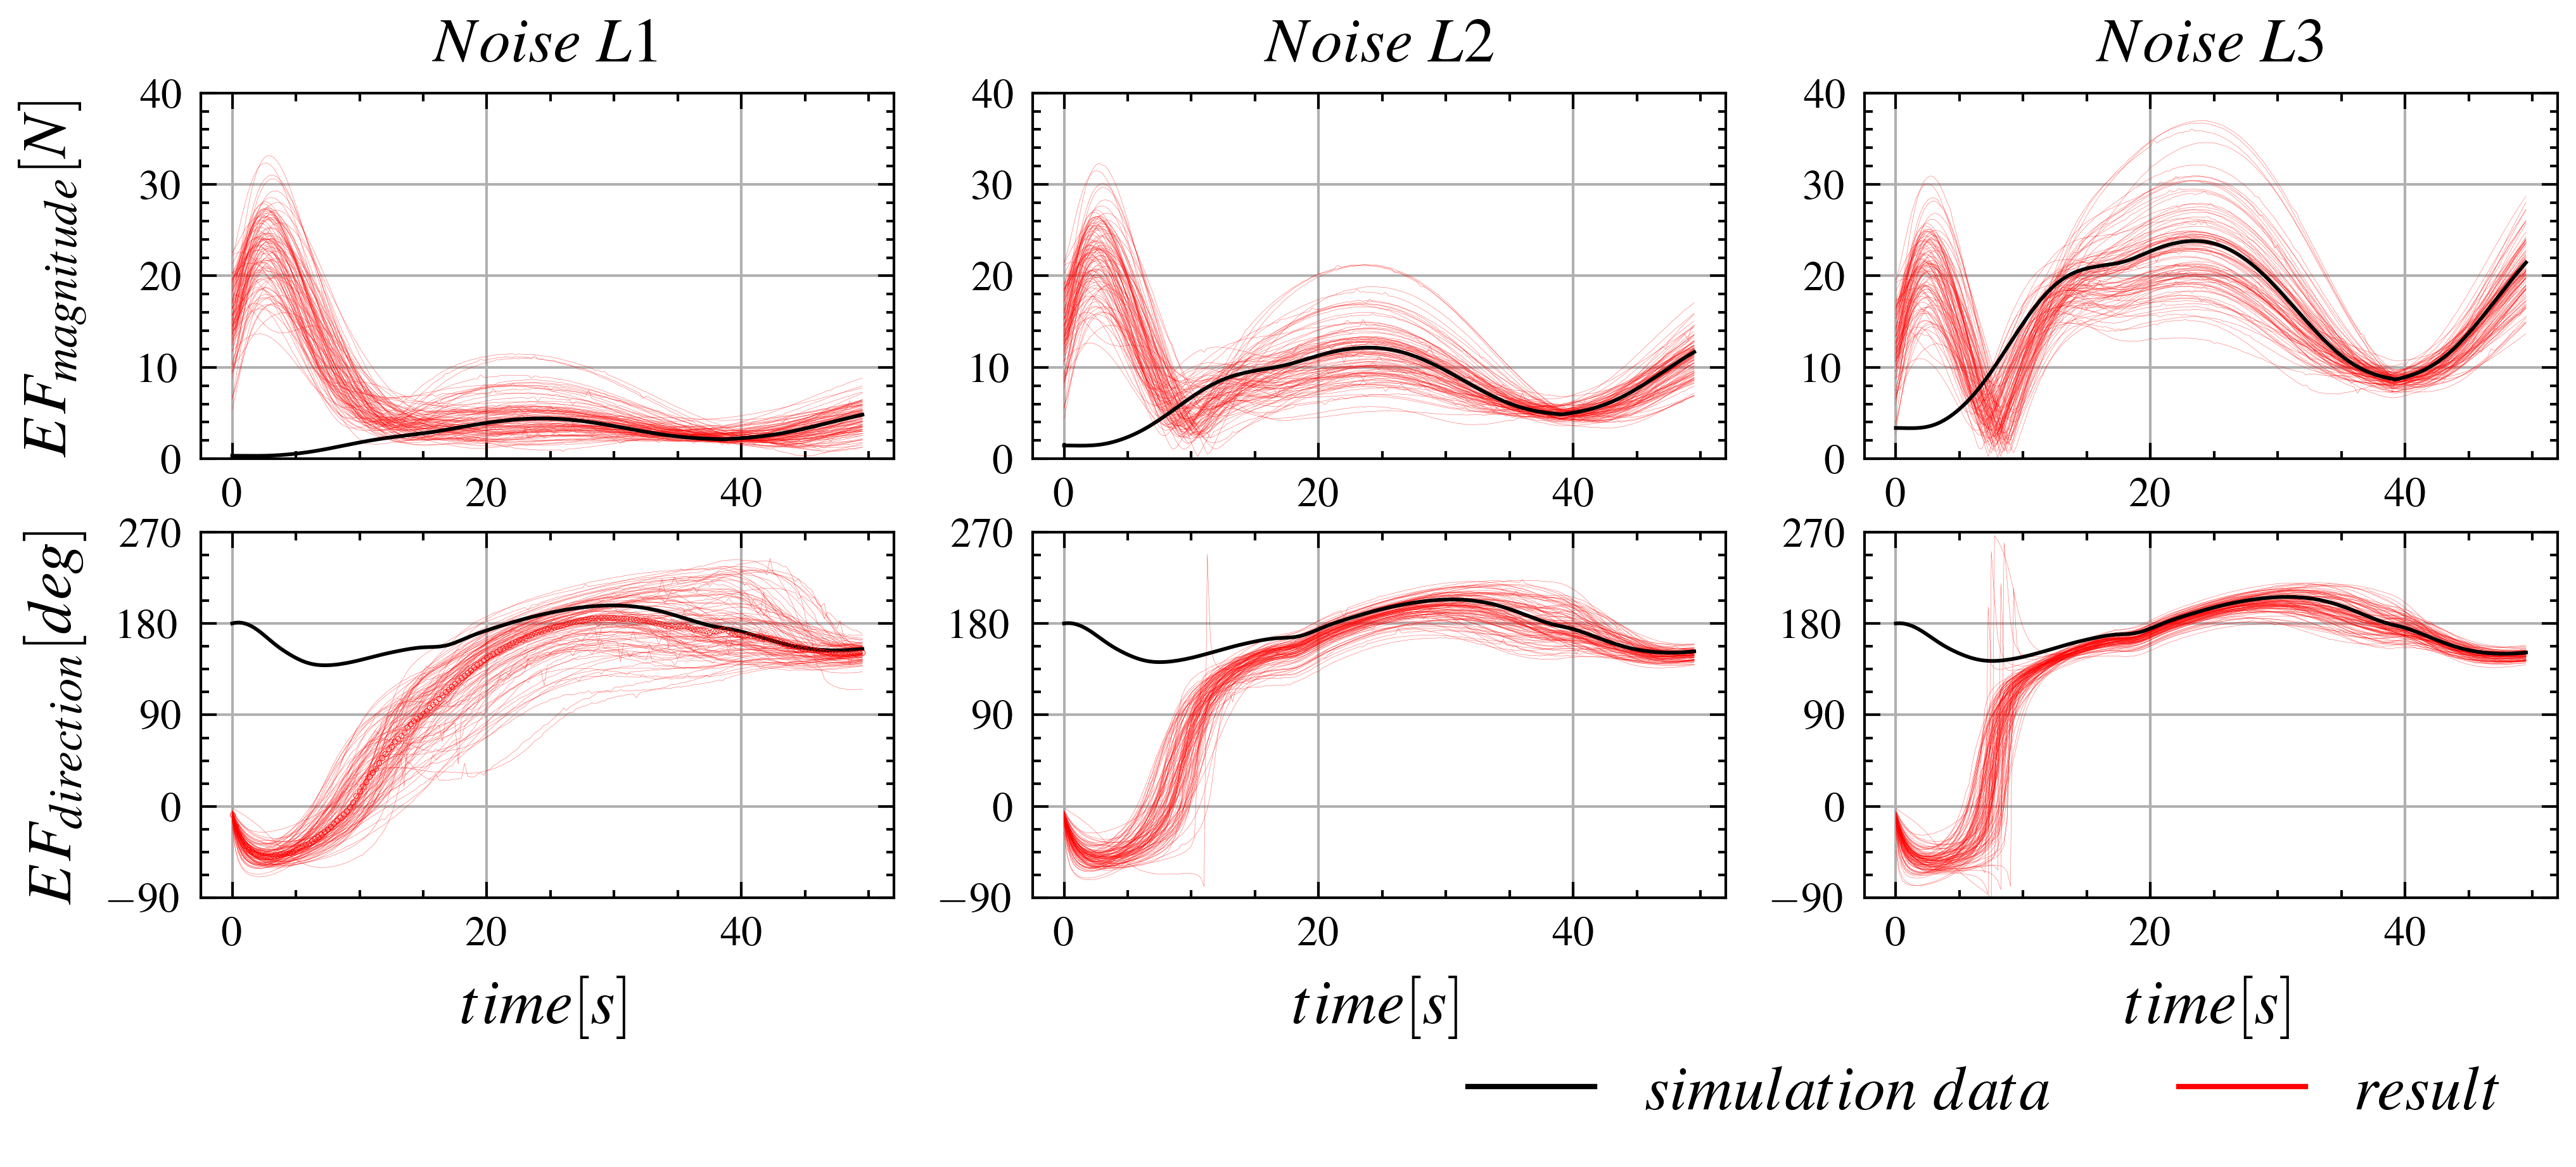

In [113]:
fig = plt.figure(figsize=(8, 2.75))

function atan2_2pi(y, x)
    θ = atan(y, x)
    return θ >= -π/2 ? θ : θ + 2π
end
function mod2(θ)
    return mod(θ + π/2, 2π) - π/2
end

ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title(L"10\mathchar`-degree~turning~test", fontsize=12)
ax1.set_title(L"U_{wind}=3.0[m/s]", fontsize=12)
ax1.set_title(L"Noise~L1", fontsize=12)
for q in 1:number
    ax1.plot(data1[q][data_start:data_end,"time"], sqrt.(data1[q][data_start:data_end,"X_F"].^2 .+ data1[q][data_start:data_end,"Y_F"].^2), "-", c="red", alpha=0.8, linewidth=0.05) 
end
ax1.plot(obs10deg[obs_start:obs_end,"time"], sqrt.(obs10deg[obs_start:obs_end,"X_wind"].^2 .+ obs10deg[obs_start:obs_end,"Y_wind"].^2), "-", c="k", alpha=1, linewidth=0.7)
# ax1.plot(obs10deg[obs_start:obs_end,"time"], sqrt.(x_F1[obs_start:obs_end,1].^2 .+ y_F1[obs_start:obs_end,1].^2), "v", label="average", c="b", markersize=1, alpha = 1)
# ax1.plot(obs10deg[obs_start:obs_end,"time"], sqrt.(x_F1[obs_start:obs_end,2].^2 .+ y_F1[obs_start:obs_end,2].^2), ".", c="red", markersize=0.2, alpha = 1)
ax1.set_ylabel(L"EF_{magnitude}[N]", fontsize=12)
ax1.set_ylim(0, 40.0)
ax1.grid()

ax2 = fig.add_subplot(2, 3, 4)
for q in 1:number
    ax2.plot(data1[q][data_start:data_end,"time"], mod2.(atan2_2pi.(data1[q][data_start:data_end,"Y_F"], data1[q][data_start:data_end,"X_F"]) .- pi .+ data1[q][data_start:data_end,"ψ"])./pi.*180, "-", c="red", alpha=0.8, linewidth=0.05)
end
ax2.plot(obs10deg[obs_start:obs_end,"time"], mod2.(atan2_2pi.(obs10deg[obs_start:obs_end,"Y_wind"], obs10deg[obs_start:obs_end,"X_wind"]) .- pi .+ obs10deg[obs_start:obs_end, "ψ"])./pi.*180, "-", c="k", alpha=1, linewidth=0.7)
# ax2.plot(obs10deg[obs_start:obs_end,"time"], atan.(x_F1[obs_start:obs_end,1]./y_F1[obs_start:obs_end,1])./pi.*180, "v", label="average", c="b", markersize=1, alpha = 1)
ax2.plot(obs10deg[obs_start:obs_end,"time"], mod2.(atan2_2pi.(y_F1[data_start:data_end,2], x_F1[data_start:data_end,2]) .- pi .+ data1[50][data_start:data_end,"ψ"])./pi.*180,  ".", c="red", markersize=0.2, alpha = 1)
ax2.set_ylabel(L"EF_{direction}[deg]", fontsize=12)
ax2.set_xlabel(L"time[s]", fontsize=12)
ax2.set_ylim(0,270)
ax2.set_yticks([-90, 0, 90, 180, 270])
ax2.grid()

ax1 = fig.add_subplot(2, 3, 2)
ax1.set_title(L"20\mathchar`-degree~turning~test", fontsize=12)
ax1.set_title(L"U_{wind}=5.0[m/s]", fontsize=12)
ax1.set_title(L"Noise~L2", fontsize=12)
for q in 1:number
    ax1.plot(data2[q][data_start:data_end,"time"], sqrt.(data2[q][data_start:data_end,"X_F"].^2 .+ data2[q][data_start:data_end,"Y_F"].^2), "-", c="red", alpha=0.8, linewidth=0.05) 
end
ax1.plot(obs20deg[obs_start:obs_end,"time"], sqrt.(obs20deg[obs_start:obs_end,"X_wind"].^2 .+ obs20deg[obs_start:obs_end,"Y_wind"].^2), "-", c="k", alpha=1, linewidth=0.7)
# ax1.plot(obs20deg[obs_start:obs_end,"time"], sqrt.(x_F2[obs_start:obs_end,1].^2 .+ y_F2[obs_start:obs_end,1].^2), "v", label="average", c="b", markersize=1, alpha = 1)
# ax1.plot(obs20deg[obs_start:obs_end,"time"], sqrt.(x_F2[obs_start:obs_end,2].^2 .+ y_F2[obs_start:obs_end,2].^2),  ".", c="red", markersize=0.2, alpha = 1)
ax1.grid()
ax1.set_ylim(0, 40.0)

ax2 = fig.add_subplot(2, 3, 5)
for q in 1:number
    ax2.plot(data2[q][data_start:data_end,"time"], mod2.((atan2_2pi.(data2[q][data_start:data_end,"Y_F"], data2[q][data_start:data_end,"X_F"]) .- pi .+ data2[q][data_start:data_end,"ψ"]))./pi.*180, "-", c="red", alpha=0.8, linewidth=0.05)
end
ax2.plot(obs20deg[obs_start:obs_end,"time"], mod2.(atan2_2pi.(obs20deg[obs_start:obs_end,"Y_wind"], obs20deg[obs_start:obs_end,"X_wind"]) .- pi .+ obs20deg[obs_start:obs_end, "ψ"])./pi.*180, "-", c="k", alpha=1, linewidth=0.7)
# ax2.plot(obs20deg[obs_start:obs_end,"time"], atan.(x_F2[obs_start:obs_end,1]./y_F2[obs_start:obs_end,1])./pi.*180, "v", label="average", c="b", markersize=1, alpha = 1)
# ax2.plot(obs20deg[obs_start:obs_end,"time"], mod.(atan2_2pi.(y_F2[data_start:data_end,2], x_F2[data_start:data_end,2]) .- pi .+ data2[50][data_start:data_end,"ψ"], 2*pi)./pi.*180,  ".", c="red", markersize=0.2, alpha = 1)
ax2.set_xlabel(L"time[s]", fontsize=12)
ax2.set_ylim(-90,270)
ax2.set_yticks([-90, 0, 90, 180, 270])
ax2.grid()

ax1 = fig.add_subplot(2, 3, 3)
ax1.set_title(L"35\mathchar`-degree~turning~test", fontsize=12)
ax1.set_title(L"U_{wind}=7.0[m/s]", fontsize=12)
ax1.set_title(L"Noise~L3", fontsize=12)
for q in 1:number
    ax1.plot(data3[q][data_start:data_end,"time"], sqrt.(data3[q][data_start:data_end,"X_F"].^2 .+ data3[q][data_start:data_end,"Y_F"].^2), "-", c="red", alpha=0.8, linewidth=0.05) 
end
ax1.plot(obs35deg[obs_start:obs_end,"time"], sqrt.(obs35deg[obs_start:obs_end,"X_wind"].^2 .+ obs35deg[obs_start:obs_end,"Y_wind"].^2), "-", c="k", alpha=1, linewidth=0.7)
# ax1.plot(obs35deg[obs_start:obs_end,"time"], sqrt.(x_F3[obs_start:obs_end,1].^2 .+ y_F3[obs_start:obs_end,1].^2), "v", label="average", c="b", markersize=1, alpha = 1)
# ax1.plot(obs35deg[obs_start:obs_end,"time"], sqrt.(x_F3[obs_start:obs_end,2].^2 .+ y_F3[obs_start:obs_end,2].^2),  ".", c="red", markersize=0.2, alpha = 1)
ax1.grid()
ax1.set_ylim(0, 40.0)

ax2 = fig.add_subplot(2, 3, 6)
for q in 1:number
    ax2.plot(data3[q][data_start:data_end,"time"], mod2.((atan2_2pi.(data3[q][data_start:data_end,"Y_F"], data3[q][data_start:data_end,"X_F"]) .- 1.0*pi .+data3[q][data_start:data_end,"ψ"]))./pi.*180, "-", c="red", alpha=0.8, linewidth=0.05)
end
ax2.plot(obs35deg[obs_start:obs_end,"time"], mod2.((atan2_2pi.(obs35deg[obs_start:obs_end,"Y_wind"], obs35deg[obs_start:obs_end,"X_wind"])) .- 1.0*pi .+ obs35deg[obs_start:obs_end, "ψ"])./pi.*180, "-", c="k", alpha=1, linewidth=0.7)
# ax2.plot(obs35deg[obs_start:obs_end,"time"], atan.(x_F3[obs_start:obs_end,1]./y_F3[obs_start:obs_end,1])./pi.*180, "v", label="average", c="b", markersize=1, alpha = 1)
# ax2.plot(obs35deg[obs_start:obs_end,"time"], mod.(atan2_2pi.(y_F3[data_start:data_end,2], x_F3[data_start:data_end,2]) .- pi .+ data3[50][data_start:data_end,"ψ"], 2*pi)./pi.*180,  ".", c="red", markersize=0.2, alpha = 1)
ax2.set_xlabel(L"time[s]", fontsize=12)
ax2.set_ylim(0,270)
ax2.set_yticks([-90, 0, 90, 180, 270])
ax2.grid()
ax2.plot([],[], "-", label=L"simulation~data",  c="black", linewidth=1)
ax2.plot([],[], "-", label=L"result",  c="red", linewidth=1)
ax2.legend(bbox_to_anchor=(1.00, -0.3), fontsize=12, ncol=2)
fig.align_labels()
display(fig)

In [114]:
error_start = 15*4
error_end =  199

L1_error1 = []
L1_error1 = abs.(sqrt.(obs10deg[error_start:error_end,"X_wind"].^2 .+ obs10deg[error_start:error_end,"Y_wind"].^2).-sqrt.(x_F1[error_start:error_end, 2].^2 .+ y_F1[error_start:error_end, 2].^2)) ./ sqrt.(obs10deg[error_start:error_end,"X_wind"].^2 .+ obs10deg[error_start:error_end,"Y_wind"].^2)
L1_error2 = []
L1_error2 = abs.(mod.(atan2_2pi.(obs10deg[error_start:error_end,"Y_wind"], obs10deg[error_start:error_end,"X_wind"]), 2*pi) .- mod.(atan2_2pi.(y_F1[error_start:error_end,2], x_F1[error_start:error_end,2]), 2*pi)) ./ mod.(atan2_2pi.(obs10deg[error_start:error_end,"Y_wind"], obs10deg[error_start:error_end,"X_wind"]), 2*pi)
L2_error1 = []
L2_error1 = abs.(sqrt.(obs20deg[error_start:error_end,"X_wind"].^2 .+ obs20deg[error_start:error_end,"Y_wind"].^2).-sqrt.(x_F2[error_start:error_end, 2].^2 .+ y_F2[error_start:error_end, 2].^2)) ./ sqrt.(obs20deg[error_start:error_end,"X_wind"].^2 .+ obs20deg[error_start:error_end,"Y_wind"].^2)
L2_error2 = []
L2_error2 = abs.(mod.(atan2_2pi.(obs20deg[error_start:error_end,"Y_wind"], obs20deg[error_start:error_end,"X_wind"]), 2*pi) .- mod.(atan2_2pi.(y_F2[error_start:error_end,2], x_F2[error_start:error_end,2]), 2*pi)) ./ mod.(atan2_2pi.(obs20deg[error_start:error_end,"Y_wind"], obs20deg[error_start:error_end,"X_wind"]), 2*pi)
L3_error1 = []
L3_error1 = abs.(sqrt.(obs35deg[error_start:error_end,"X_wind"].^2 .+ obs35deg[error_start:error_end,"Y_wind"].^2).-sqrt.(x_F3[error_start:error_end, 2].^2 .+ y_F3[error_start:error_end, 2].^2)) ./ sqrt.(obs35deg[error_start:error_end,"X_wind"].^2 .+ obs35deg[error_start:error_end,"Y_wind"].^2)
L3_error2 = []
L3_error2 = abs.(mod.(atan2_2pi.(obs35deg[error_start:error_end,"Y_wind"], obs35deg[error_start:error_end,"X_wind"]), 2*pi) .- mod.(atan2_2pi.(y_F3[error_start:error_end,2], x_F3[error_start:error_end,2]), 2*pi)) ./ mod.(atan2_2pi.(obs35deg[error_start:error_end,"Y_wind"], obs35deg[error_start:error_end,"X_wind"]), 2*pi)

print("L1_error1: ", mean(L1_error1)*100, " [%] ")
println("L1_error2: ", mean(L1_error2)*100, " [%]")
print("L2_error1: ", mean(L2_error1)*100, " [%] ")
println("L2_error2: ", mean(L2_error2)*100, " [%]")
print("L3_error1: ", mean(L3_error1)*100, " [%] ")
println("L3_error2: ", mean(L3_error2)*100, " [%]")

L1_error1 = []
L1_error1 = abs.(sqrt.(obs10deg[error_start:error_end,"X_wind"].^2 .+ obs10deg[error_start:error_end,"Y_wind"].^2).-sqrt.(x_F1[error_start:error_end, 2].^2 .+ y_F1[error_start:error_end, 2].^2))
L1_error2 = []
L1_error2 = abs.(mod.(atan2_2pi.(obs10deg[error_start:error_end,"Y_wind"], obs10deg[error_start:error_end,"X_wind"]), 2*pi) .- mod.(atan2_2pi.(y_F1[error_start:error_end,2], x_F1[error_start:error_end,2]), 2*pi))
L2_error1 = []
L2_error1 = abs.(sqrt.(obs20deg[error_start:error_end,"X_wind"].^2 .+ obs20deg[error_start:error_end,"Y_wind"].^2).-sqrt.(x_F2[error_start:error_end, 2].^2 .+ y_F2[error_start:error_end, 2].^2))
L2_error2 = []
L2_error2 = abs.(mod.(atan2_2pi.(obs20deg[error_start:error_end,"Y_wind"], obs20deg[error_start:error_end,"X_wind"]), 2*pi) .- mod.(atan2_2pi.(y_F2[error_start:error_end,2], x_F2[error_start:error_end,2]), 2*pi))
L3_error1 = []
L3_error1 = abs.(sqrt.(obs35deg[error_start:error_end,"X_wind"].^2 .+ obs35deg[error_start:error_end,"Y_wind"].^2).-sqrt.(x_F3[error_start:error_end, 2].^2 .+ y_F3[error_start:error_end, 2].^2))
L3_error2 = []
L3_error2 = abs.(mod.(atan2_2pi.(obs35deg[error_start:error_end,"Y_wind"], obs35deg[error_start:error_end,"X_wind"]), 2*pi) .- mod.(atan2_2pi.(y_F3[error_start:error_end,2], x_F3[error_start:error_end,2]), 2*pi))

print("L1_error1: ", mean(L1_error1), " [N] ")
println("L1_error2: ", mean(L1_error2)/pi*180, " [deg]")
print("L2_error1: ", mean(L2_error1), " [N] ")
println("L2_error2: ", mean(L2_error2)/pi*180, " [deg]")
print("L3_error1: ", mean(L3_error1), " [N] ")
println("L3_error2: ", mean(L3_error2)/pi*180, " [deg]")

L1_max1 = Float64[]
L1_min1 = Float64[]
for t in error_start:error_end
    max_val = maximum([sqrt(data1[q][t, "X_F"]^2 + data1[q][t, "Y_F"]^2) for q in 1:number if t in eachindex(data1[q][!, "time"])])
    min_val = minimum([sqrt(data1[q][t, "X_F"]^2 + data1[q][t, "Y_F"]^2) for q in 1:number if t in eachindex(data1[q][!, "time"])])
    push!(L1_max1, max_val)
    push!(L1_min1, min_val)
end
L1_max2 = Float64[]
L1_min2 = Float64[]
for t in error_start:error_end
    max_val = maximum([mod(atan2_2pi(data1[q][t, "Y_F"], data1[q][t, "X_F"]) - pi + data1[q][t, "ψ"], 2*pi) for q in 1:number if t in eachindex(data1[q][!, "time"])])
    min_val = minimum([mod(atan2_2pi(data1[q][t, "Y_F"], data1[q][t, "X_F"]) - pi + data1[q][t, "ψ"], 2*pi) for q in 1:number if t in eachindex(data1[q][!, "time"])])
    push!(L1_max2, max_val)
    push!(L1_min2, min_val)
end
L2_max1 = Float64[]
L2_min1 = Float64[]
for t in error_start:error_end
    max_val = maximum([sqrt(data2[q][t, "X_F"]^2 + data2[q][t, "Y_F"]^2) for q in 1:number if t in eachindex(data2[q][!, "time"])])
    min_val = minimum([sqrt(data2[q][t, "X_F"]^2 + data2[q][t, "Y_F"]^2) for q in 1:number if t in eachindex(data2[q][!, "time"])])
    push!(L2_max1, max_val)
    push!(L2_min1, min_val)
end
L2_max2 = Float64[]
L2_min2 = Float64[]
for t in error_start:error_end
    max_val = maximum([mod(atan2_2pi(data2[q][t, "Y_F"], data2[q][t, "X_F"]) - pi + data2[q][t, "ψ"], 2*pi) for q in 1:number if t in eachindex(data2[q][!, "time"])])
    min_val = minimum([mod(atan2_2pi(data2[q][t, "Y_F"], data2[q][t, "X_F"]) - pi + data2[q][t, "ψ"], 2*pi) for q in 1:number if t in eachindex(data2[q][!, "time"])])
    push!(L2_max2, max_val)
    push!(L2_min2, min_val)
end
L3_max1 = Float64[]
L3_min1 = Float64[]
for t in error_start:error_end
    max_val = maximum([sqrt(data3[q][t, "X_F"]^2 + data3[q][t, "Y_F"]^2) for q in 1:number if t in eachindex(data3[q][!, "time"])])
    min_val = minimum([sqrt(data3[q][t, "X_F"]^2 + data3[q][t, "Y_F"]^2) for q in 1:number if t in eachindex(data3[q][!, "time"])])
    push!(L3_max1, max_val)
    push!(L3_min1, min_val)
end
L3_max2 = Float64[]
L3_min2 = Float64[]
for t in error_start:error_end
    max_val = maximum([mod(atan2_2pi(data3[q][t, "Y_F"], data3[q][t, "X_F"]) - pi + data3[q][t, "ψ"], 2*pi) for q in 1:number if t in eachindex(data3[q][!, "time"])])
    min_val = minimum([mod(atan2_2pi(data3[q][t, "Y_F"], data3[q][t, "X_F"]) - pi + data3[q][t, "ψ"], 2*pi) for q in 1:number if t in eachindex(data3[q][!, "time"])])
    push!(L3_max2, max_val)
    push!(L3_min2, min_val)
end

print("L1_width1 ", mean(L1_max1 .- L1_min1), " [N] ")
println("L1_width2 ", mean(L1_max2 .- L1_min2)/pi*180, " [deg]")
print("L2_width1 ", mean(L2_max1 .- L2_min1), " [N] ")
println("L2_width2 ", mean(L2_max2 .- L2_min2)/pi*180, " [deg]")
print("L3_width1 ", mean(L3_max1 .- L3_min1), " [N] ")
println("L3_width2 ", mean(L3_max2 .- L3_min2)/pi*180, " [deg]")

L1_error1: 6.17392805894001 [%] L1_error2: 5.847583484287015 [%]
L2_error1: 5.270113605535067 [%] L2_error2: 2.531268695956608 [%]
L3_error1: 4.6111441911572415 [%] L3_error2: 1.6908884952659793 [%]
L1_error1: 0.21816490139952274 [N] L1_error2: 14.511945731038477 [deg]
L2_error1: 0.4986677772856868 [N] L2_error2: 5.895847812167901 [deg]
L3_error1: 0.8282757652698739 [N] L3_error2: 3.6947657323721725 [deg]
L1_width1 6.788623332237369 [N] L1_width2 116.566079322138 [deg]
L2_width1 10.307611821838057 [N] L2_width2 50.6046645007206 [deg]
L3_width1 14.818686741239139 [N] L3_width2 34.973370838932134 [deg]


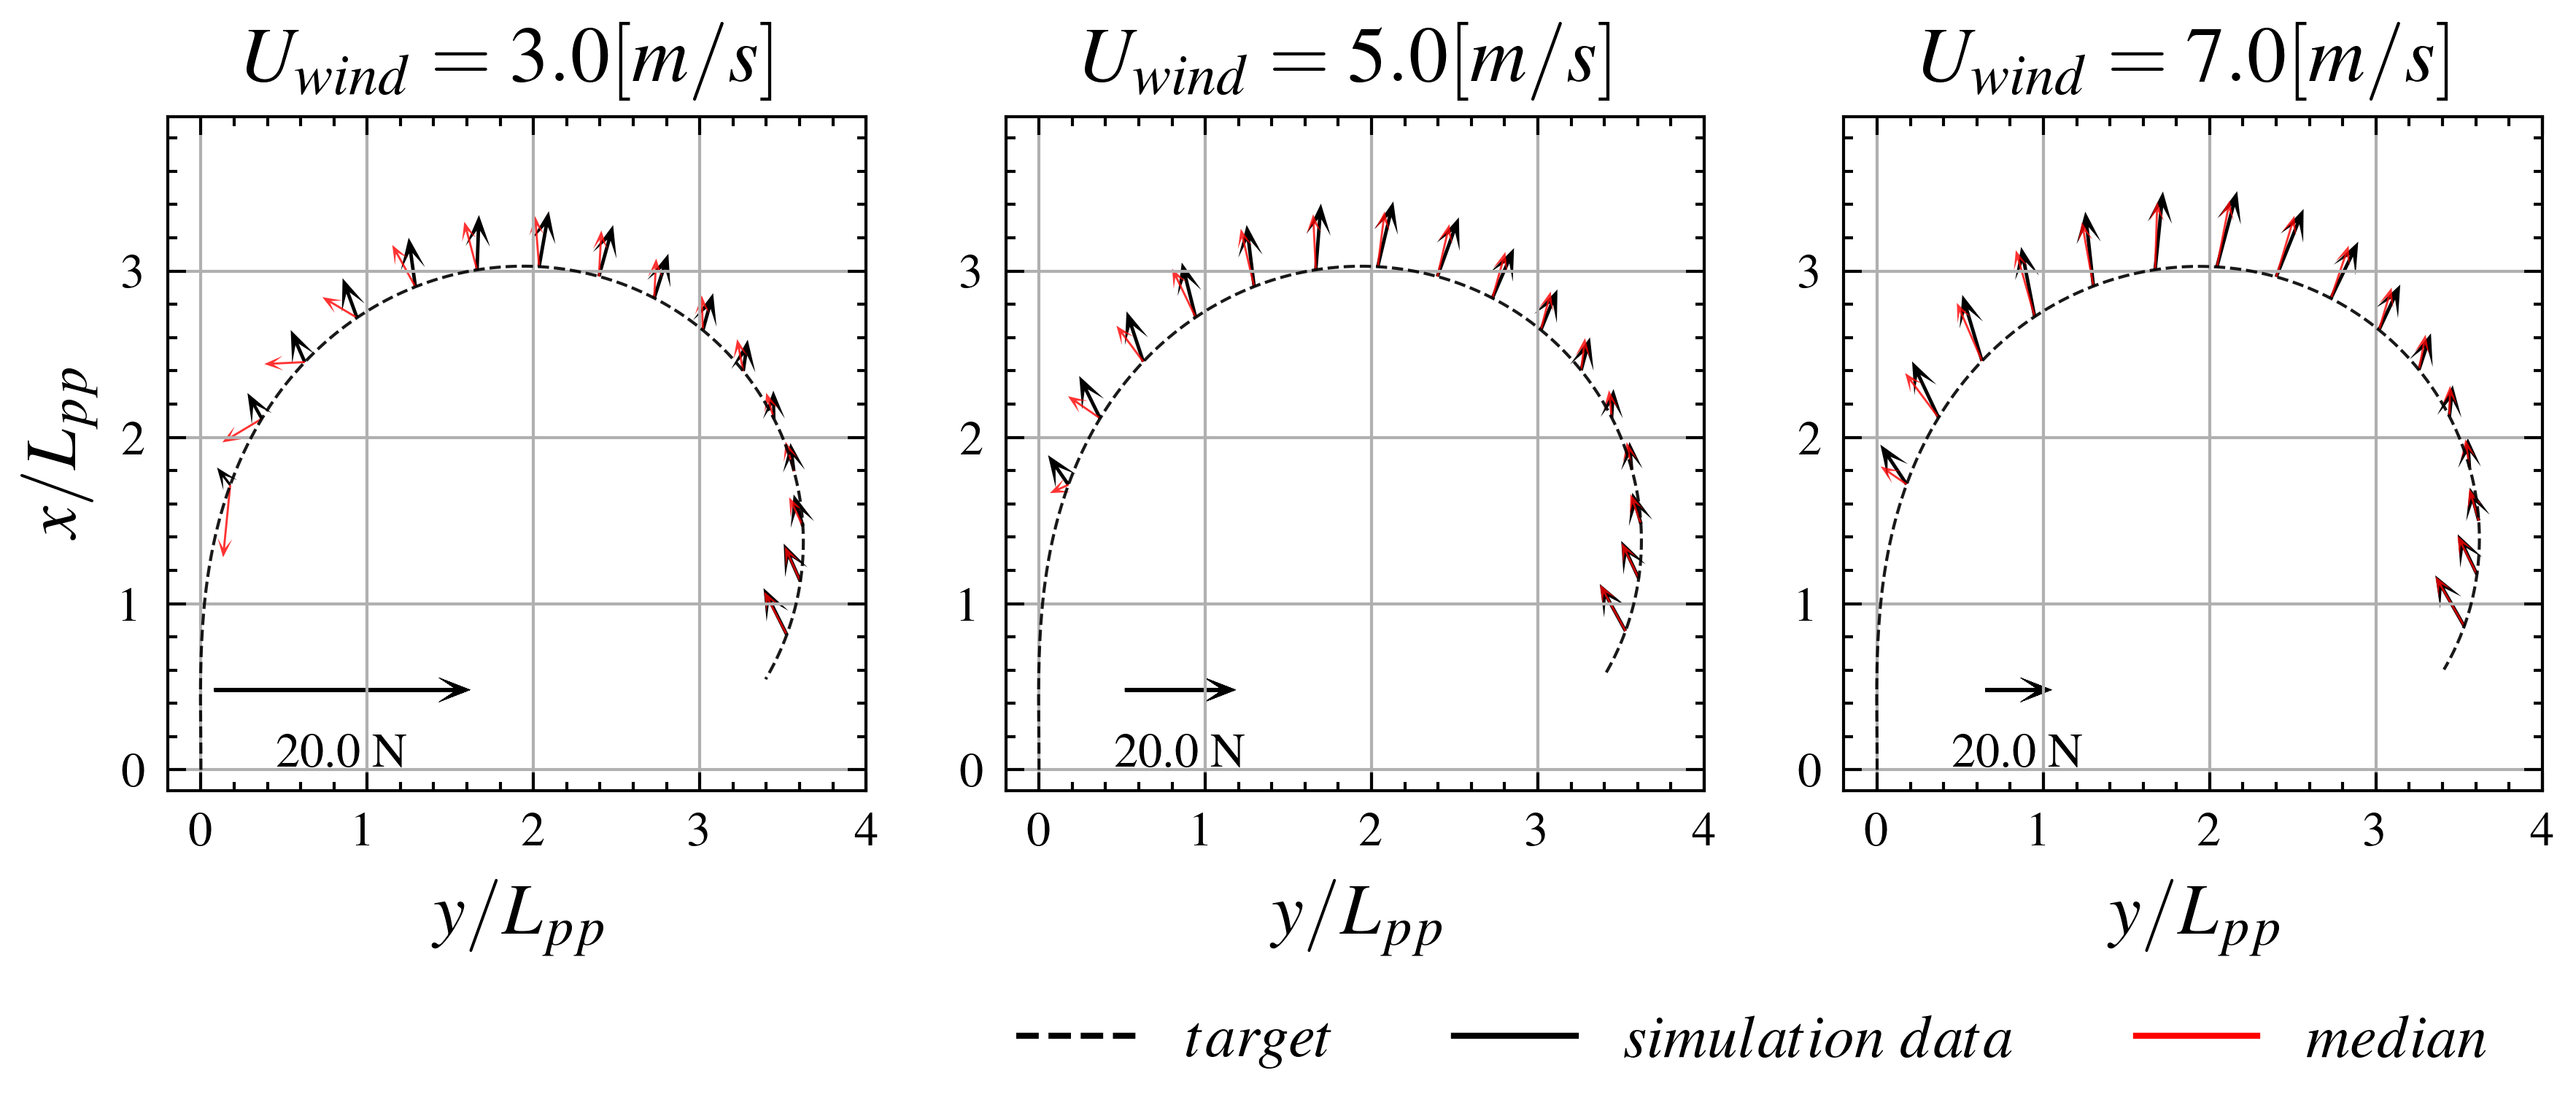

In [127]:
L_pp =7.0
fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1, 3, 1)
ax.grid()
skip = 10
scale = 13
width = 0.005
headwidth = 7
headlength = 9
alpha = 1
start = 40
whole_step = Int(50/0.25)-1
ax.set_title(L"10\mathchar`-degree~turning~test", fontsize=13)
ax.set_title(L"U_{wind}=3.0[m/s]", fontsize=13)
# ax.set_title(L"Noise~L1", fontsize=13)
quiver1 = ax.quiver(obs10deg[start:skip:whole_step,"y"]/L_pp, obs10deg[start:skip:whole_step,"x"]/L_pp, obs10deg[start:skip:whole_step,"Y_wind"].*cos.(obs10deg[start:skip:whole_step,"ψ"]).+obs10deg[start:skip:whole_step,"X_wind"].*sin.(obs10deg[start:skip:whole_step,"ψ"]), .-obs10deg[start:skip:whole_step,"Y_wind"].*sin.(obs10deg[start:skip:whole_step,"ψ"])+obs10deg[start:skip:whole_step,"X_wind"].*cos.(obs10deg[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width, headwidth=headwidth, headlength=headlength, color="k", alpha=alpha)
ax.quiver(obs10deg[start:skip:whole_step,"y"]/L_pp, obs10deg[start:skip:whole_step,"x"]/L_pp, y_F1[start:skip:whole_step,3], x_F1[start:skip:whole_step,3], angles="xy", scale_units="xy" ,scale=scale, width=0.003,  color="red", alpha=0.8, headwidth=headwidth, headlength=headlength)
ax.plot(obs10deg[1:whole_step,"y"]/L_pp, obs10deg[1:whole_step,"x"]/L_pp, "--", c="k", alpha=0.9, linewidth=0.5)
# ax.plot(obs10deg[start:skip:whole_step,"y"], obs10deg[start:skip:whole_step,"x"], ".", c="k", markersize=3)
ax.quiverkey(quiver1, X=0.25, Y=0.15, U=20.0, label="20.0 N", labelpos="S")
ax.set_ylabel(L"x/L_{pp}", fontsize=12)
ax.set_xlabel(L"y/L_{pp}", fontsize=12)  
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_yticks([0,1,2,3,4,5])

ax.axis("equal")
ax.set_ylim(-0.5,6)
ax.set_xlim(-0.4,5.9)
ax.set_ylim(-0.2,4.0)
ax.set_xlim(-0.2,4.0)

scale = 30
ax = fig.add_subplot(1, 3, 2)
ax.grid()
ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=13)
ax.set_title(L"U_{wind}=5.0[m/s]", fontsize=13)
# ax.set_title(L"Noise~L2", fontsize=13)
quiver2 = ax.quiver(obs20deg[start:skip:whole_step,"y"]/L_pp, obs20deg[start:skip:whole_step,"x"]/L_pp, obs20deg[start:skip:whole_step,"Y_wind"].*cos.(obs20deg[start:skip:whole_step,"ψ"]).+obs20deg[start:skip:whole_step,"X_wind"].*sin.(obs20deg[start:skip:whole_step,"ψ"]), .-obs20deg[start:skip:whole_step,"Y_wind"].*sin.(obs20deg[start:skip:whole_step,"ψ"])+obs20deg[start:skip:whole_step,"X_wind"].*cos.(obs20deg[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width, headwidth=headwidth, headlength=headlength, color="k", alpha=alpha)
ax.quiver(obs20deg[start:skip:whole_step,"y"]/L_pp, obs20deg[start:skip:whole_step,"x"]/L_pp, y_F2[start:skip:whole_step,3], x_F2[start:skip:whole_step,3], angles="xy", scale_units="xy" ,scale=scale, width=0.003, color="red", alpha=0.8, headwidth=headwidth, headlength=headlength)
ax.plot(obs20deg[1:whole_step,"y"]/L_pp, obs20deg[1:whole_step,"x"]/L_pp, "--", c="k", alpha=0.9, linewidth=0.5)
# ax.plot(obs20deg[start:skip:whole_step,"y"], obs20deg[start:skip:whole_step,"x"], ".", c="k", markersize=3)
ax.quiverkey(quiver2, X=0.25, Y=0.15, U=20.0, label="20.0 N", labelpos="S")
ax.set_xlabel(L"y/L_{pp}", fontsize=12)
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_yticks([0,1,2,3,4,5])
ax.axis("equal")
ax.set_ylim(-0.2,4.0)
ax.set_xlim(-0.2,4.0)

scale = 50
ax = fig.add_subplot(1, 3, 3)
ax.grid()
ax.set_title(L"35\mathchar`-degree~turning~test", fontsize=13)
ax.set_title(L"U_{wind}=7.0[m/s]", fontsize=13)
# ax.set_title(L"Noise~L3", fontsize=13)
quiver3 = ax.quiver(obs35deg[start:skip:whole_step,"y"]/L_pp, obs35deg[start:skip:whole_step,"x"]/L_pp, obs35deg[start:skip:whole_step,"Y_wind"].*cos.(obs35deg[start:skip:whole_step,"ψ"]).+obs35deg[start:skip:whole_step,"X_wind"].*sin.(obs35deg[start:skip:whole_step,"ψ"]), .-obs35deg[start:skip:whole_step,"Y_wind"].*sin.(obs35deg[start:skip:whole_step,"ψ"])+obs35deg[start:skip:whole_step,"X_wind"].*cos.(obs35deg[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width, headwidth=headwidth, headlength=headlength, color="k", alpha=alpha)
ax.quiver(obs35deg[start:skip:whole_step,"y"]/L_pp, obs35deg[start:skip:whole_step,"x"]/L_pp, y_F3[start:skip:whole_step,3], x_F3[start:skip:whole_step,3], angles="xy", scale_units="xy" ,scale=scale, width=0.003, color="red", alpha=0.8, headwidth=headwidth, headlength=headlength)
ax.plot(obs35deg[1:whole_step,"y"]/L_pp, obs35deg[1:whole_step,"x"]/L_pp, "--", c="k", alpha=0.9, linewidth=0.5)
# ax.plot(obs35deg[start:skip:whole_step,"y"], obs35deg[start:skip:whole_step,"x"], ".", c="k", markersize=3)
# ax.quiverkey(quiver3, X=-2.18, Y=-0.335, U=50.0, label="50.0 N", labelpos="S")
ax.quiverkey(quiver3, X=0.25, Y=0.15, U=20.0, label="20.0 N", labelpos="S")
ax.set_xlabel(L"y/L_{pp}", fontsize=12)
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_yticks([0,1,2,3,4,5])
ax.axis("equal")
ax.set_ylim(-0.2,3.1)
ax.set_xlim(-0.2,3.1)
ax.set_ylim(-0.2,4.0)
ax.set_xlim(-0.2,4.0)

ax.plot([],[], "--", label=L"target",  c="k", linewidth=1)
ax.plot([],[], "-", label=L"simulation~data",  c="black", linewidth=1)
ax.plot([],[], "-", label=L"median",  c="red", linewidth=1)

ax.legend(bbox_to_anchor=(1.0, -0.25), fontsize=10, ncol = 4)

display(fig)

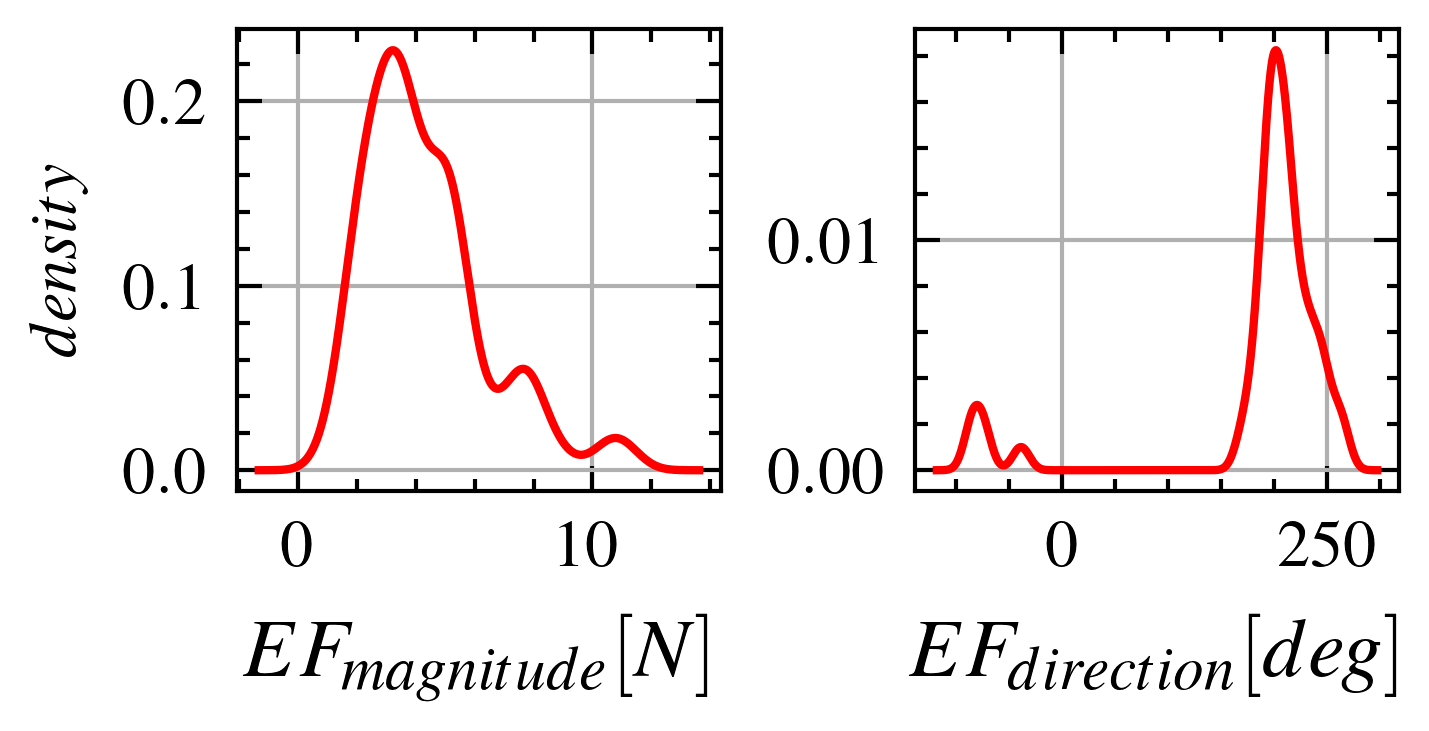

In [117]:
fig = plt.figure(figsize=(2.5, 1))

time = 20
dt = Int(time*4)
EF_posterior = []
for i in 1:number
    push!(EF_posterior, sqrt.(data1[i][dt,"X_F"]^2+data1[i][dt,"Y_F"]^2))
end
EF_posterior = Float64[EF_posterior...]
kde_result = kde(EF_posterior)

ax = fig.add_subplot(1, 2, 1)
ax.plot(kde_result.x, kde_result.density, c="red", linewidth=1.0)
# ax.axvline(sqrt.(x_F1[dt,1]^2+y_F1[dt,1]^2), c="orange", linestyle="--", linewidth=0.5)
# ax.axvline(sqrt.(x_F1[dt,2]^2+y_F1[dt,2]^2), c="g", linestyle="--", linewidth=0.5)
# ax.axvline(sqrt.(obs10deg[dt,"X_wind"]^2+obs10deg[dt,"Y_wind"]^2), c="k", linestyle="--", linewidth=0.5)
ax.set_xlabel(L"EF_{magnitude}[N]", fontsize=10)
ax.set_ylabel(L"density", fontsize=8)
# ax.set_title(L"time=t[s]")
ax.grid()

time = 20
dt = Int(time*4)
EF_posterior = []
for i in 1:number
    push!(EF_posterior, atan2_2pi(data1[i][dt,"X_F"], data1[i][dt,"Y_F"])/pi*180)
end
EF_posterior = Float64[EF_posterior...]
kde_result = kde(EF_posterior)

ax = fig.add_subplot(1, 2, 2)
ax.plot(kde_result.x, kde_result.density, c="red", linewidth=1.0)
# ax.axvline(atan2_2pi(x_F1[dt,1], y_F1[dt,1])/pi*180, c="orange", linestyle="--", linewidth=0.5)
# ax.axvline(atan2_2pi.(x_F1[dt,2], y_F1[dt,2])/pi*180, c="g", linestyle="--", linewidth=0.5)
# ax.axvline(atan2_2pi.(obs10deg[dt,"X_wind"], obs10deg[dt,"Y_wind"])/pi*180, c="k", linestyle="--", linewidth=0.5)
ax.set_xlabel(L"EF_{direction}[deg]", fontsize=10)
# ax.set_title(L"time=t[s]")
ax.grid()
plt.subplots_adjust(wspace=0.4)
display(fig)

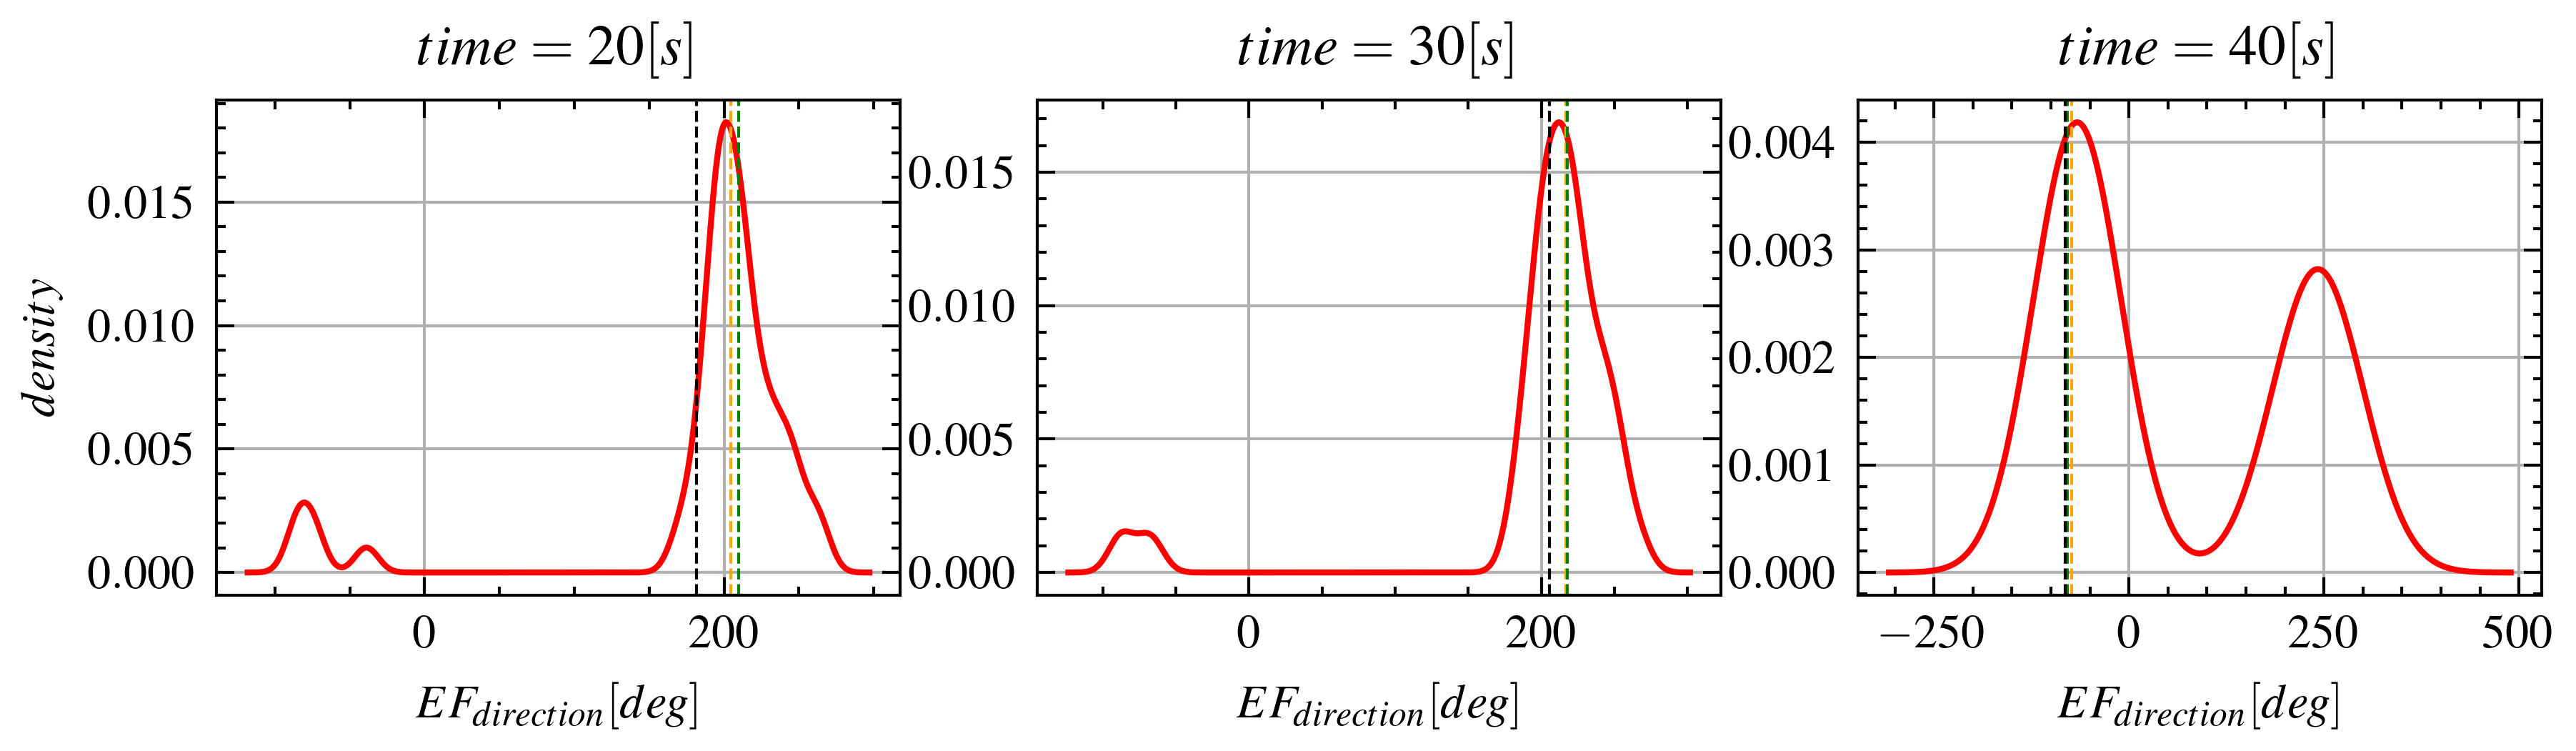

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [118]:
fig = plt.figure(figsize=(7, 1.5))

time = 20
dt = Int(time*4)
EF_posterior = []
for i in 1:number
    push!(EF_posterior, atan2_2pi(data1[i][dt,"X_F"], data1[i][dt,"Y_F"])/pi*180)
end
EF_posterior = Float64[EF_posterior...]
kde_result = kde(EF_posterior)

ax = fig.add_subplot(1, 3, 1)
ax.plot(kde_result.x, kde_result.density, c="red", linewidth=1.0)
ax.axvline(atan2_2pi(x_F1[dt,1], y_F1[dt,1])/pi*180, c="orange", linestyle="--", linewidth=0.5)
ax.axvline(atan2_2pi.(x_F1[dt,2], y_F1[dt,2])/pi*180, c="g", linestyle="--", linewidth=0.5)
ax.axvline(atan2_2pi.(obs10deg[dt,"X_wind"], obs10deg[dt,"Y_wind"])/pi*180, c="k", linestyle="--", linewidth=0.5)
ax.set_xlabel(L"EF_{direction}[deg]")
ax.set_ylabel(L"density")
ax.set_title(L"time=20[s]")
ax.grid()
ax.legend()

time = 30
dt = Int(time*4)
EF_posterior = []
for i in 1:number
    push!(EF_posterior, atan2_2pi(data1[i][dt,"X_F"], data1[i][dt,"Y_F"])/pi*180)
end
EF_posterior = Float64[EF_posterior...]
kde_result = kde(EF_posterior)

ax = fig.add_subplot(1, 3, 2)
ax.plot(kde_result.x, kde_result.density, c="red", linewidth=1.0)
ax.axvline(atan2_2pi(x_F1[dt,1], y_F1[dt,1])/pi*180, c="orange", linestyle="--", linewidth=0.5)
ax.axvline(atan2_2pi.(x_F1[dt,2], y_F1[dt,2])/pi*180, c="g", linestyle="--", linewidth=0.5)
ax.axvline(atan2_2pi.(obs10deg[dt,"X_wind"], obs10deg[dt,"Y_wind"])/pi*180, c="k", linestyle="--", linewidth=0.5)
ax.set_xlabel(L"EF_{direction}[deg]")
ax.set_title(L"time=30[s]")
ax.grid()
ax.legend()

time = 40
dt = Int(time*4)
EF_posterior = []
for i in 1:number
    push!(EF_posterior, atan2_2pi(data1[i][dt,"X_F"], data1[i][dt,"Y_F"])/pi*180)
end
EF_posterior = Float64[EF_posterior...]
kde_result = kde(EF_posterior)

ax = fig.add_subplot(1, 3, 3)
ax.plot(kde_result.x, kde_result.density, c="red", linewidth=1.0)
ax.axvline(atan2_2pi(x_F1[dt,1], y_F1[dt,1])/pi*180, c="orange", linestyle="--", linewidth=0.5)
ax.axvline(atan2_2pi.(x_F1[dt,2], y_F1[dt,2])/pi*180, c="g", linestyle="--", linewidth=0.5)
ax.axvline(atan2_2pi.(obs10deg[dt,"X_wind"], obs10deg[dt,"Y_wind"])/pi*180, c="k", linestyle="--", linewidth=0.5)
ax.set_xlabel(L"EF_{direction}[deg]")
ax.set_title(L"time=40[s]")
ax.grid()
ax.legend()
display(fig)

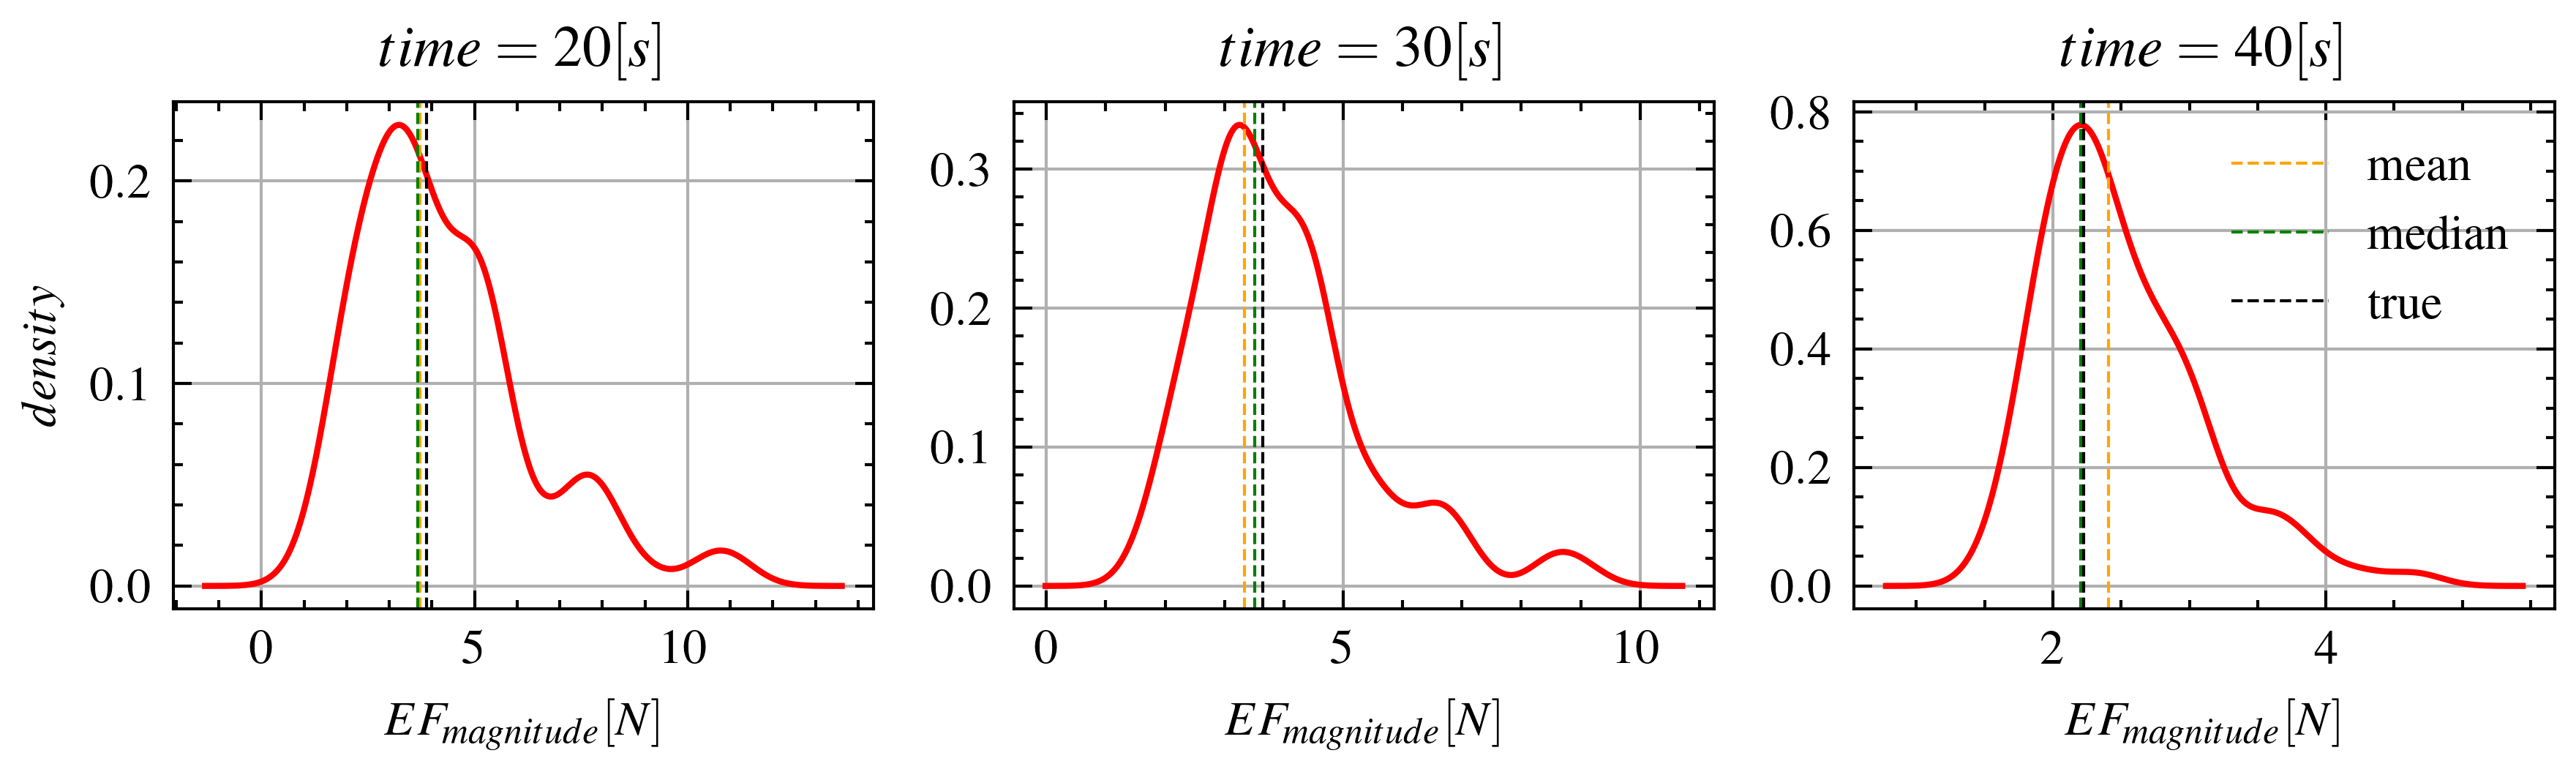

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [119]:
fig = plt.figure(figsize=(7, 1.5))

time = 20
dt = Int(time*4)
EF_posterior = []
for i in 1:number
    push!(EF_posterior, sqrt.(data1[i][dt,"X_F"]^2+data1[i][dt,"Y_F"]^2))
end
EF_posterior = Float64[EF_posterior...]
kde_result = kde(EF_posterior)

ax = fig.add_subplot(1, 3, 1)
ax.plot(kde_result.x, kde_result.density, c="red", linewidth=1.0)
ax.axvline(sqrt.(x_F1[dt,1]^2+y_F1[dt,1]^2), c="orange", linestyle="--", linewidth=0.5)
ax.axvline(sqrt.(x_F1[dt,2]^2+y_F1[dt,2]^2), c="g", linestyle="--", linewidth=0.5)
ax.axvline(sqrt.(obs10deg[dt,"X_wind"]^2+obs10deg[dt,"Y_wind"]^2), c="k", linestyle="--", linewidth=0.5)
ax.set_xlabel(L"EF_{magnitude}[N]")
ax.set_ylabel(L"density")
ax.set_title(L"time=20[s]")
ax.grid()
ax.legend()

time = 30
dt = Int(time*4)
EF_posterior = []
for i in 1:number
    push!(EF_posterior, sqrt.(data1[i][dt,"X_F"]^2+data1[i][dt,"Y_F"]^2))
end
EF_posterior = Float64[EF_posterior...]
kde_result = kde(EF_posterior)

ax = fig.add_subplot(1, 3, 2)
ax.plot(kde_result.x, kde_result.density, c="red", linewidth=1.0)
ax.axvline(sqrt.(x_F1[dt,1]^2+y_F1[dt,1]^2), c="orange", linestyle="--", linewidth=0.5)
ax.axvline(sqrt.(x_F1[dt,2]^2+y_F1[dt,2]^2), c="g", linestyle="--", linewidth=0.5)
ax.axvline(sqrt.(obs10deg[dt,"X_wind"]^2+obs10deg[dt,"Y_wind"]^2), c="k", linestyle="--", linewidth=0.5)
ax.set_xlabel(L"EF_{magnitude}[N]")
ax.set_title(L"time=30[s]")
ax.grid()
ax.legend()

time = 40
dt = Int(time*4)
EF_posterior = []
for i in 1:number
    push!(EF_posterior, sqrt.(data1[i][dt,"X_F"]^2+data1[i][dt,"Y_F"]^2))
end
EF_posterior = Float64[EF_posterior...]
kde_result = kde(EF_posterior)

ax = fig.add_subplot(1, 3, 3)
ax.plot(kde_result.x, kde_result.density, c="red", linewidth=1.0)
ax.axvline(sqrt.(x_F1[dt,1]^2+y_F1[dt,1]^2), c="orange", linestyle="--", linewidth=0.5, label="mean")
ax.axvline(sqrt.(x_F1[dt,2]^2+y_F1[dt,2]^2), c="g", linestyle="--", linewidth=0.5, label="median")
ax.axvline(sqrt.(obs10deg[dt,"X_wind"]^2+obs10deg[dt,"Y_wind"]^2), c="k", linestyle="--", linewidth=0.5, label="true")
ax.set_xlabel(L"EF_{magnitude}[N]")
ax.set_title(L"time=40[s]")
ax.grid()
ax.legend()
display(fig)